# Seaborn
Seaborn은 Matplotlib을 기반의 다양한 색상 테마와 통계용 차트 등의 기능을 추가적으로 겸비한 시각화 패키지입니다.  
기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존합니다.  
http://seaborn.pydata.org/

## 카운트 플롯
countplot() 을 이용하면 각 카테고리마다 데이터가 얼마나 있는지 시각화할 수 있습니다. 카테고리별 히스토그램이라고 볼 수도 있는데요. API와 옵션은 Bar chart와 동일합니다.

### 테마를 활용해서 스타일 적용하기
set_theme() 는 global 범위의 테마를 적용해서 그래프를 쉽게 꾸밀 수 있습니다. style과 palette 키워드 인수를 활용해서 그 값을 설정합니다.
- style: darkgrid, whitegrid, dark, white, ticks, ...
- palette: pastel, husl, spectral, flare, ...  

### 테마 외의 스타일 적용
set_context() 의 인수로 paper, notebook, talk, poster 를 활용해 프레젠테이션이나 보고서와 같은 다양한 매체에 활용할 수 있는 스타일링을 할 수 있습니다.  
set_style() 로 background, grid, spine, tick을 정의해 그림의 전반적인 모양을 스타일링 할 수 있습니다.

In [1]:
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")
sns.set_context("paper")

## Return to countplot issue
아래의 카운트 플롯을 보면 마치 value_counts() 의 결과를 보여주는 듯합니다. 유니크한 값들이 각각 몇개씩 있는지 시각적으로 확인할 수 있습니다.

<AxesSubplot:xlabel='class', ylabel='count'>

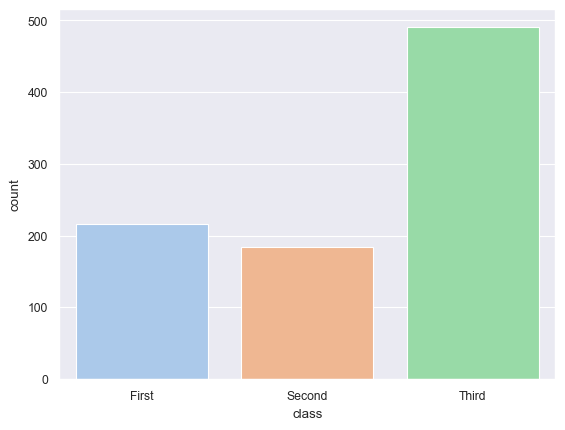

In [2]:
import seaborn as sns

# Show the number of datapoints with each value of a categorical variable
df = sns.load_dataset('titanic')
sns.countplot(x=df['class']) # x 키워드 인수에 Series를 전달

<AxesSubplot:xlabel='class', ylabel='count'>

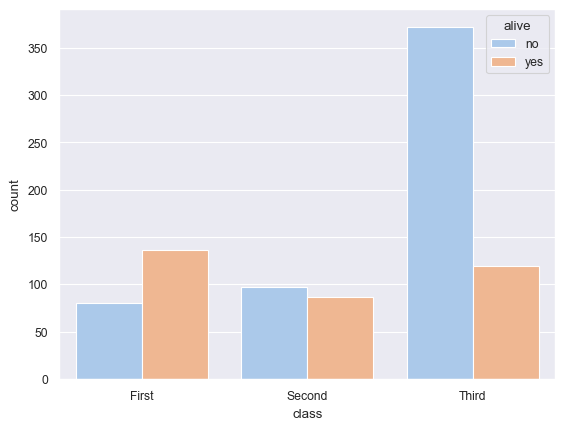

In [3]:
# hue 키워드 인수를 활용해 분류할 두 번째 변수를 설정할 수 있습니다.
sns.countplot(data=df, x='class', hue='alive') # 각 인수를 어떻게 전달하는지 주목하세요.

<AxesSubplot:xlabel='count', ylabel='deck'>

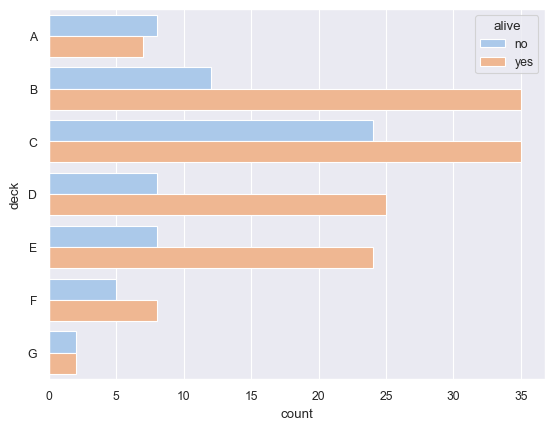

In [4]:
# 플롯을 수평하게 출력
sns.countplot(data=df, y="deck", hue="alive")

### tips 데이터셋
- total_bill: 총 지불 금액($)
- tip: 팁($)
- sex: 성별
- smoker: 흡연 여부
- day: 요일
- time: 식사 시간대
- size: 식사 인원

In [11]:
tips = sns.load_dataset('tips')
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [15]:
tips.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [14]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### rugplot()
rug 플롯은 데이터 위치를 x축 위의 작은 선분(rug)으로 나타내 실제 데이터들의 위치를 보여줍니다.  
커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법입니다.

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

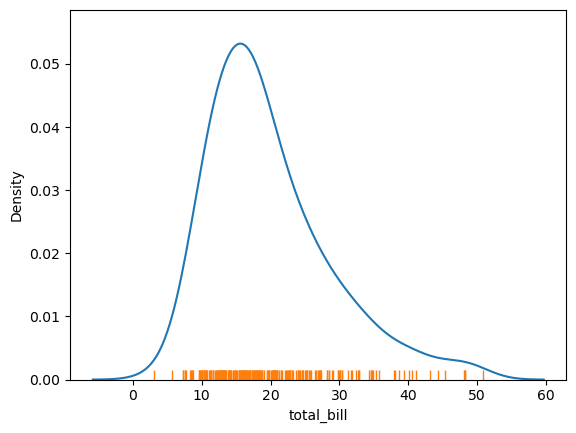

In [12]:
sns.kdeplot(data=tips, x='total_bill')
sns.rugplot(data=tips, x='total_bill')

축 쪽에 몰려서 표현되는걸 marginal 하다고 표현하곤 한다고 합니다.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

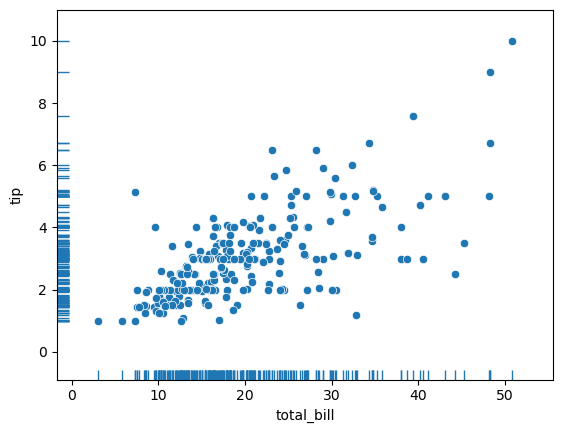

In [17]:
# Add a rug along both axes
sns.scatterplot(data=tips, x='total_bill', y='tip')
sns.rugplot(data=tips, x='total_bill', y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

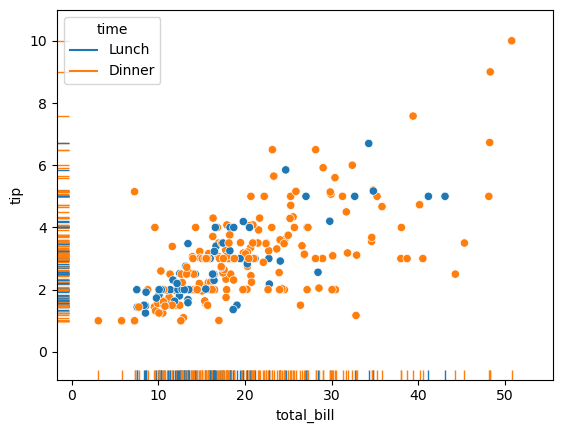

In [19]:
# Represent a third variable with hue mapping
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
sns.rugplot(data=tips, x='total_bill', y='tip', hue='time')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

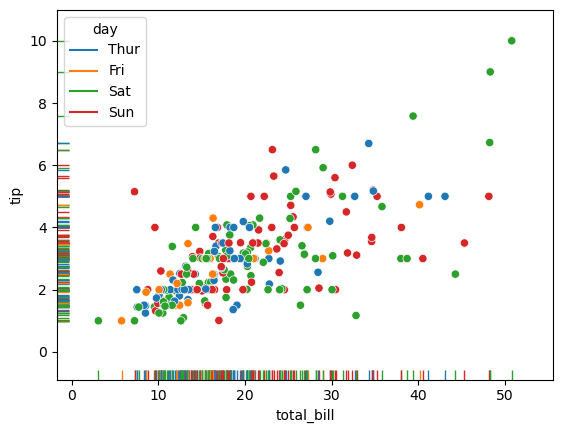

In [18]:
# Change hue argument
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day')
sns.rugplot(data=tips, x='total_bill', y='tip', hue='day')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

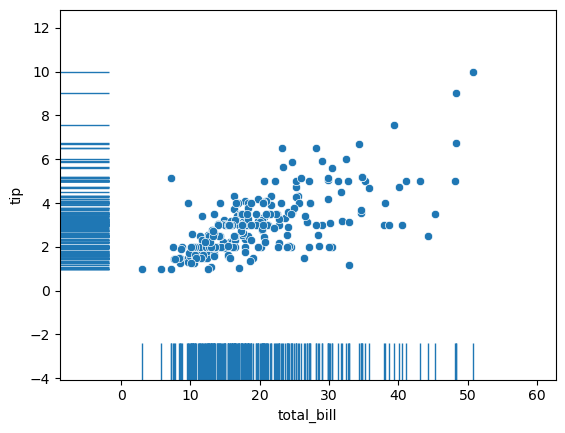

In [21]:
# Draw a taller rug
sns.scatterplot(data=tips, x='total_bill', y='tip')
sns.rugplot(data=tips, x='total_bill', y='tip', height=.1)

<AxesSubplot:xlabel='carat', ylabel='price'>

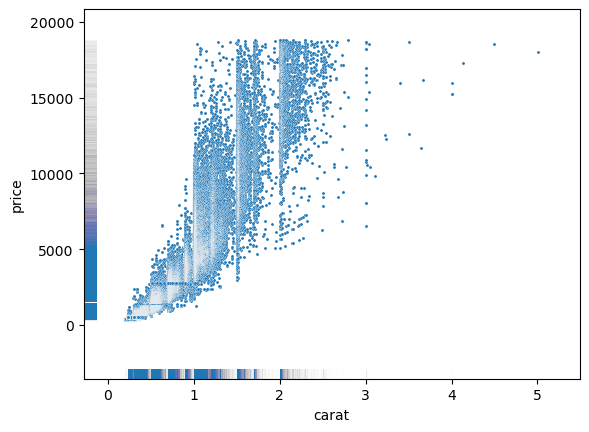

In [22]:
# Show the density of a larger dataset using thinner lines and alpha blending
diamonds = sns.load_dataset('diamonds')
sns.scatterplot(data=diamonds, x='carat', y='price', s=5)
sns.rugplot(data=diamonds, x='carat', y='price', lw=1, alpha=.005)

## 히스토그램 - histplot()
1차원 혹은 2차원 데이터의 분포를 히스토그램으로 보여줍니다.

### 히스토그램 - penguins dataset

In [6]:
penguins = sns.load_dataset("penguins")
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

- species: 펭귄의 종(Chinstrap, Adélie, Gentoo)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: 체중(g)
- island: 서식지 섬 (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- sex: 펭귄 성별

In [8]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

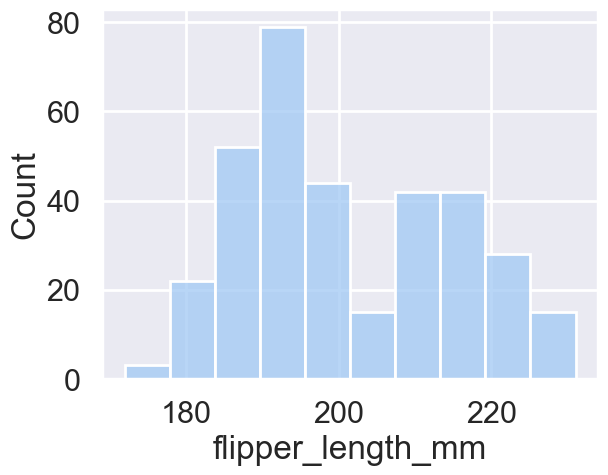

In [10]:
# flipper 길이에 대한 분포를 x축 기준으로 히스토그램을 나타내는 예제.
sns.histplot(data=penguins, x='flipper_length_mm')

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

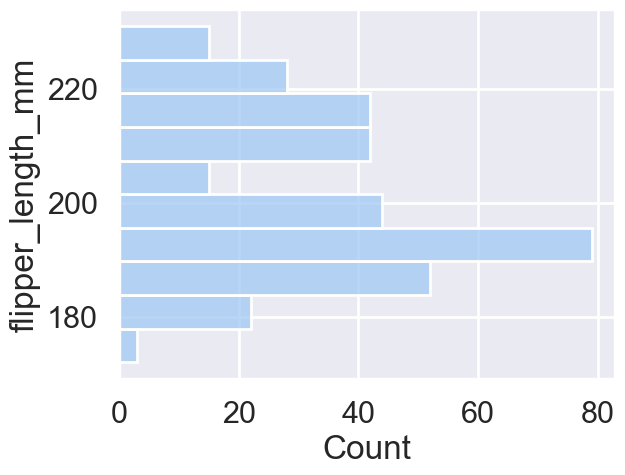

In [11]:
sns.histplot(data=penguins, y='flipper_length_mm')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

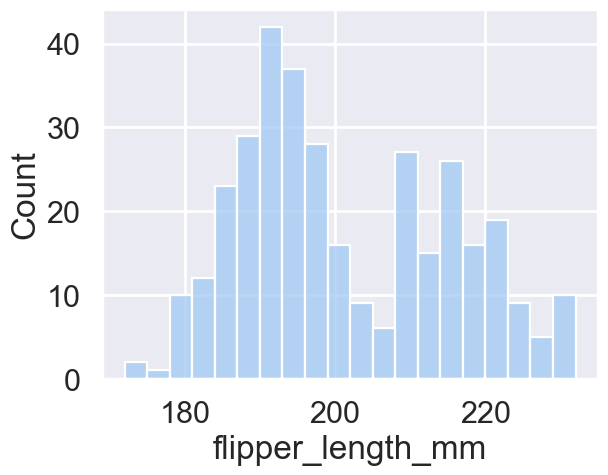

In [12]:
sns.histplot(data=penguins, x='flipper_length_mm', binwidth=3) # bin의 너비 지정

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

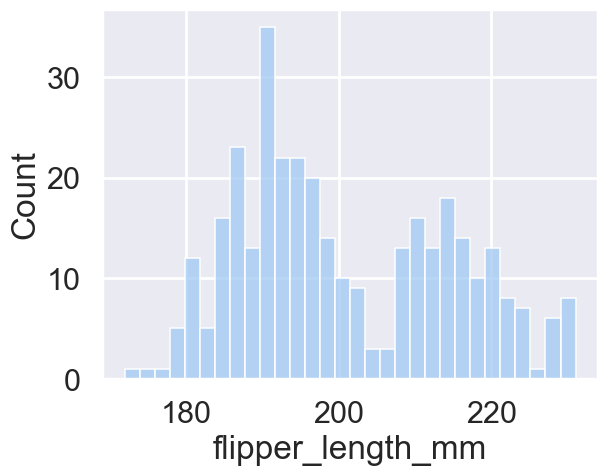

In [13]:
sns.histplot(data=penguins, x='flipper_length_mm', bins=30) # bin 개수 지정

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

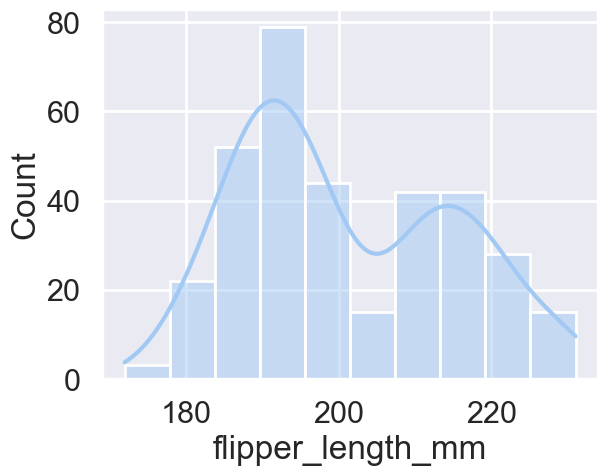

In [14]:
# kde 그래프와 동시에 출력
sns.histplot(data=penguins, x='flipper_length_mm', kde=True)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

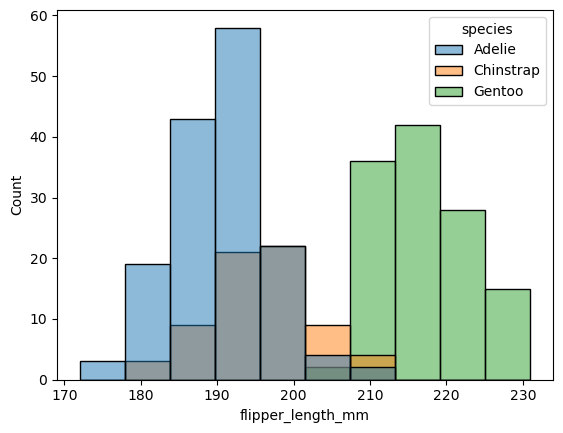

In [33]:
# hue 키워드 인수로 데이터 분리, 여러 개의 히스토그램을 합친 것과 같은 결과
sns.histplot(data=penguins, x='flipper_length_mm', hue='species')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

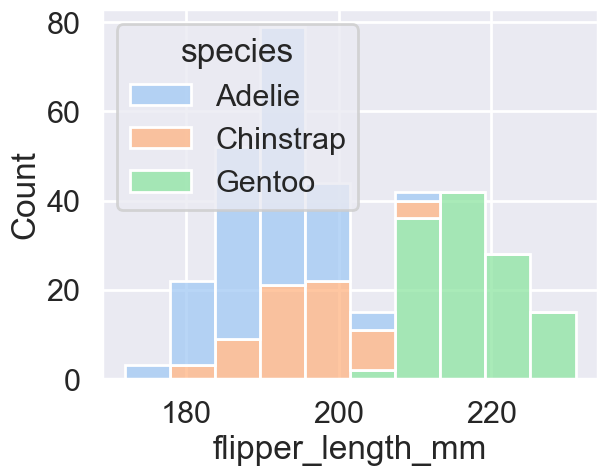

In [15]:
# 누적하듯 표현하기 위한 multiple keyword parameter에 stack 전달
sns.histplot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

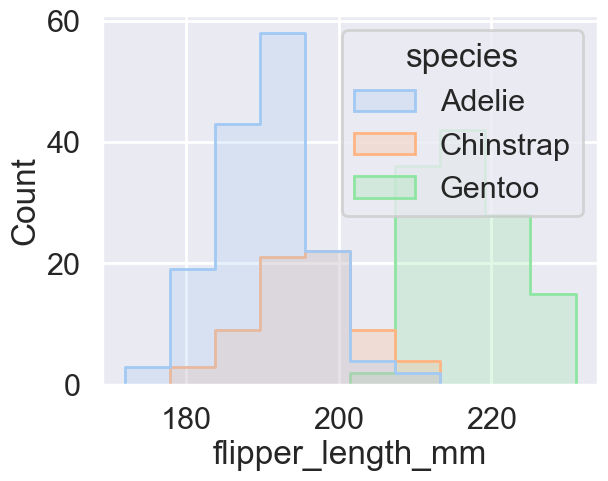

In [16]:
# 오버래핑된 결과가 보기 힘들다면 elements keyword parameter에 step 전달
sns.histplot(data=penguins, x='flipper_length_mm', hue='species', element='step')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

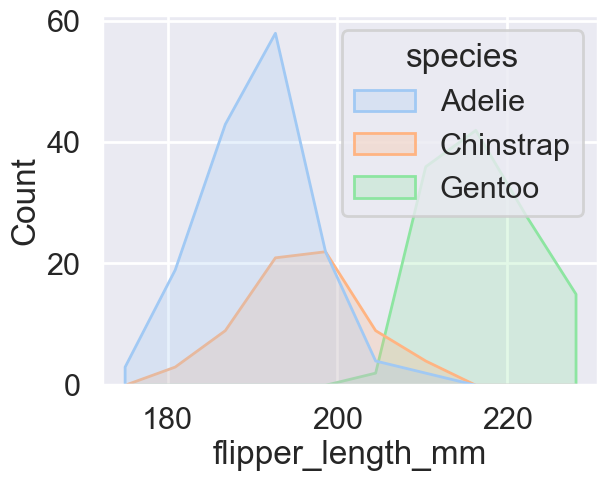

In [17]:
# 다각형 형태로 표현
sns.histplot(data=penguins, x='flipper_length_mm', hue='species', element='poly')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

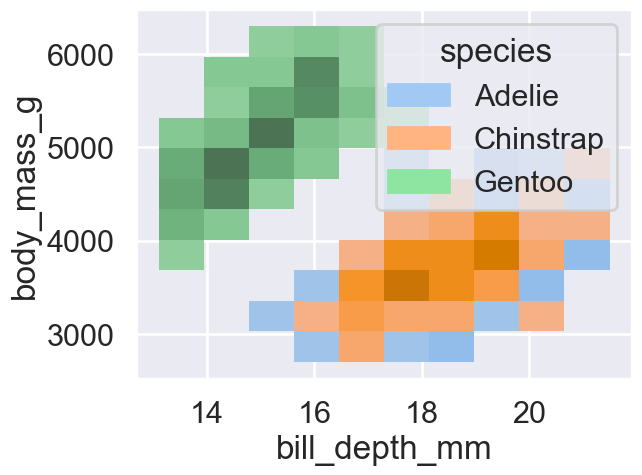

In [18]:
# x, y축 모두 column을 할당하면 heatmap 형태의 히스토그램으로 표현
sns.histplot(data=penguins, x='bill_depth_mm', y='body_mass_g', hue='species')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='species'>

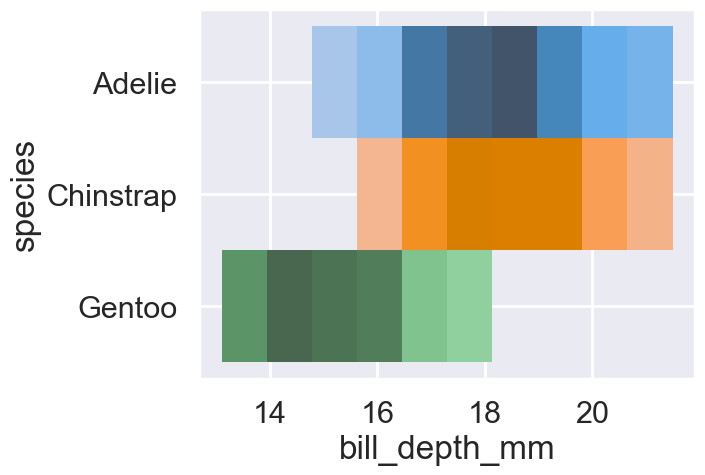

In [19]:
# x, y축 모두 column을 할당할 때 그 중 하나의 값이 이산된 값이라면
sns.histplot(data=penguins, x='bill_depth_mm', y='species', hue='species', legend=False)

## 히스토그램 - displot()
마찬가지로 1차원 혹은 2차원 데이터의 분포를 히스토그램으로 보여줍니다.  
rug와 kde에 대해 동시에 표현이 가능해 표현 범위가 더 넓고 더 많이 사용됩니다.

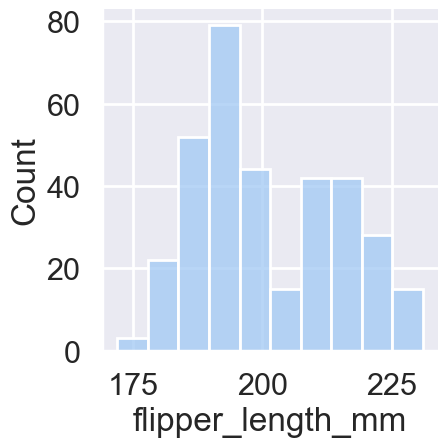

In [20]:
sns.displot(data=penguins, x='flipper_length_mm')

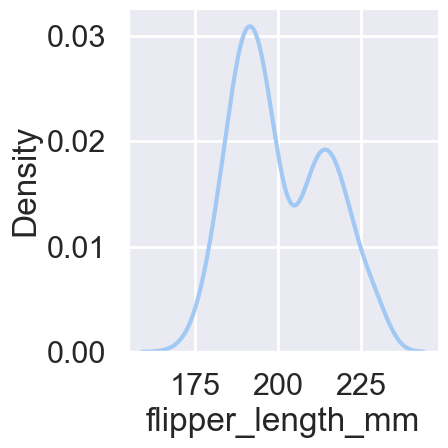

In [22]:
sns.displot(data=penguins, x='flipper_length_mm', kind='kde')

### ecdf로 표현

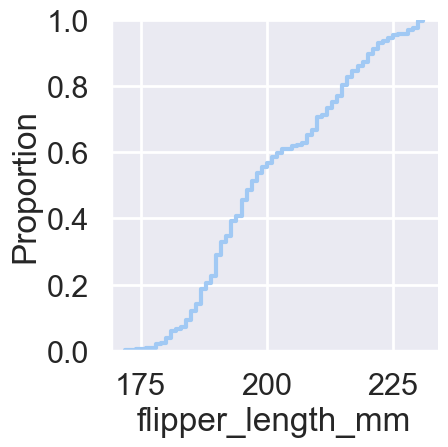

In [23]:
# There are three main plot kinds;
# in addition to histograms and kernel density estimates (KDEs),
# you can also draw empirical cumulative distribution functions (ECDFs)
sns.displot(data=penguins, x='flipper_length_mm', kind='ecdf')

### 히스토그램과 kde 동시에 표현

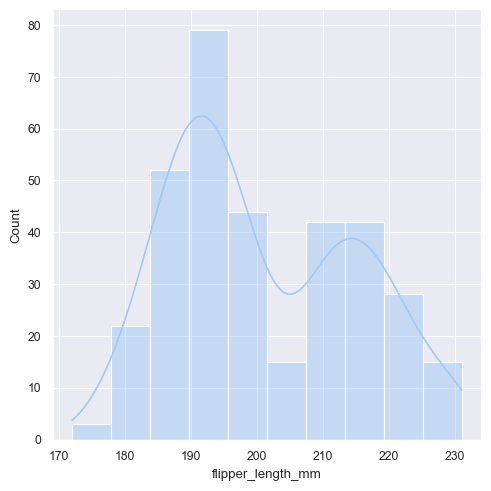

In [25]:
sns.displot(data=penguins, x='flipper_length_mm', kde=True) # kind=kde 로 인수를 줬을 때와 비교해서 차이점을 생각해보세요.

### x, y 모두 값 할당

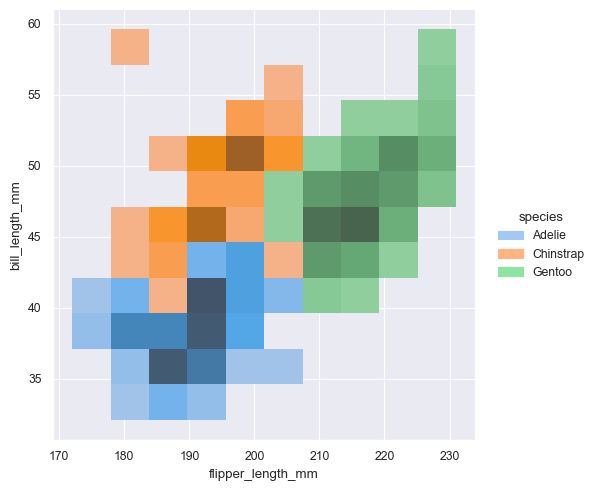

In [26]:
sns.displot(data=penguins, x='flipper_length_mm', y='bill_length_mm', hue='species')

### 2개 값을 kde로 표현

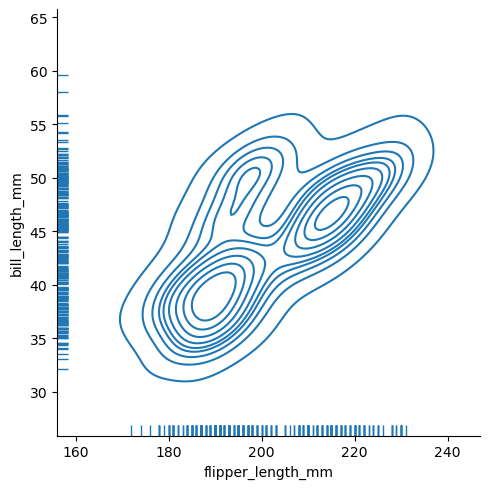

In [54]:
# x, y축 모두 할당한 앞의 히스토그램을 kde로 표현 가능. rug 표현도 동시에 가능.
q = sns.displot(data=penguins, x='flipper_length_mm', y='bill_length_mm', kind='kde', rug=True) # 바깥 쪽에 있ㄴ는게 marginal

### hue로 subset 나누기

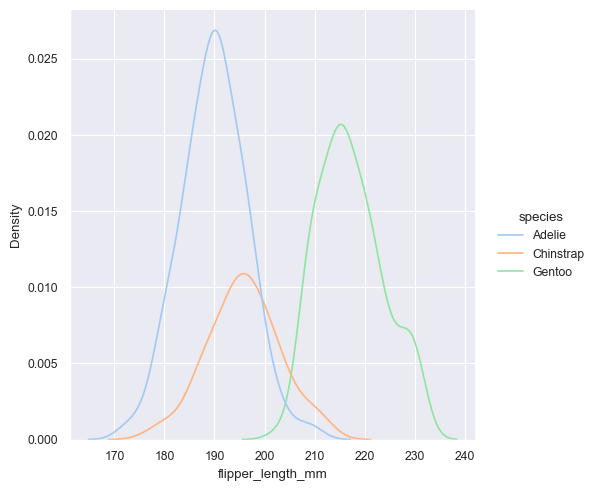

In [8]:
# hue 키워드 인수를 통해 subset을 구분하고 이를 각각의 그래프로 표현할 수 있다.
sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='kde')

### col로 그래프 나누기
displot() 은 col keyword parameter를 활용해서 subset을 한번 더 분류할 수 있습니다.

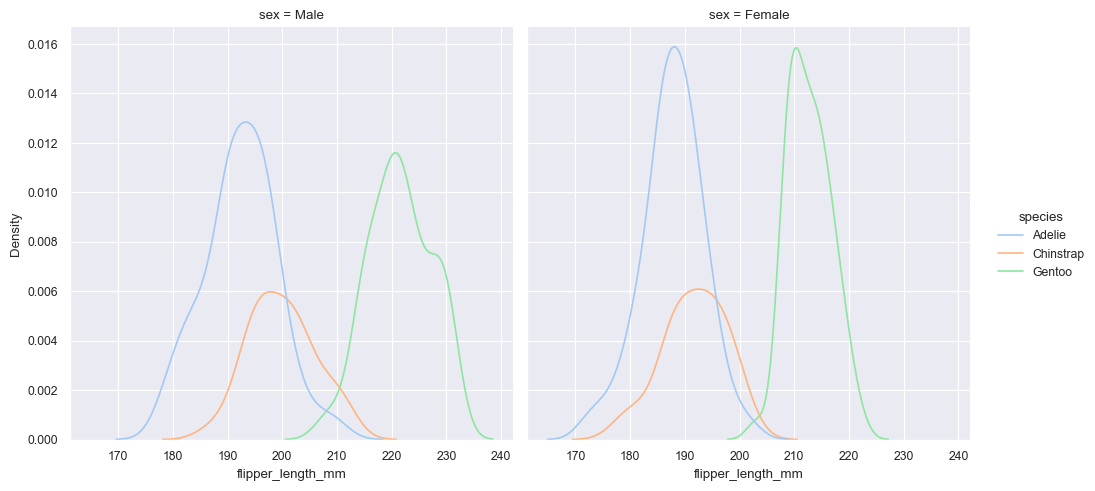

In [10]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='sex', kind='kde')

### 그래프 크기 설정

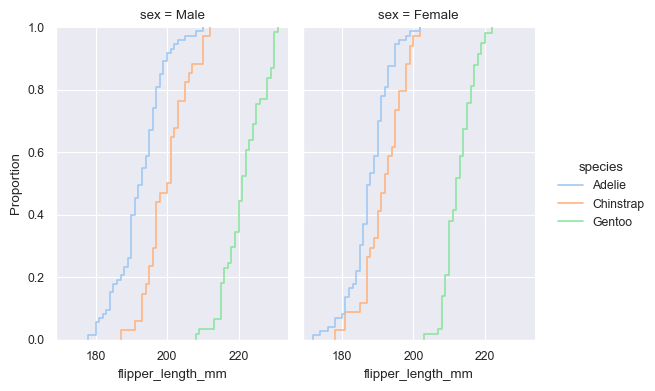

In [11]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species',
col='sex', kind='ecdf', height=4, aspect=.7)
# height의 단위는 inches이며 aspect는 너비로 height와 aspect를 곱해서 얻는다.
# 높이 대비 너비 비율을 지정합니다.

### Label, title
axis label은 set_axis_labels(xlabel, ylabel) 메서드를, title은 set_titles() 를 활용해 지정합니다.  
formatting keys 인 {col_var}와 {col_name}을 조합해 포맷팅할 수 있습니다.

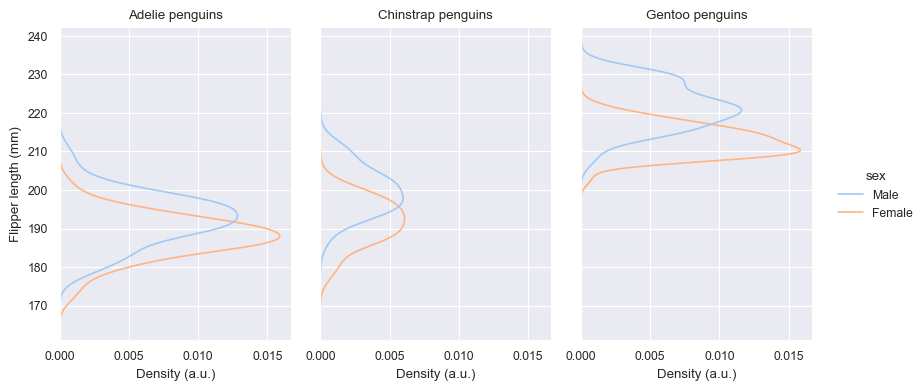

In [12]:
q= sns.displot(
    data=penguins, y='flipper_length_mm', hue='sex', col='species',
    kind='kde', height=4, aspect=.7
)
q.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
q.set_titles("{col_name} penguins")

#### 연습 문제
펭귄 데이터 셋을 불러오고 각 컬럼마다의 결측치의 개수를 구해보세요.

In [65]:
import seaborn as sns

penguins = sns.load_dataset('penguins')

peng_findna = penguins.isna()
peng_findna

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      False   False           False          False              False   
1      False   False           False          False              False   
2      False   False           False          False              False   
3      False   False            True           True               True   
4      False   False           False          False              False   
..       ...     ...             ...            ...                ...   
339    False   False            True           True               True   
340    False   False           False          False              False   
341    False   False           False          False              False   
342    False   False           False          False              False   
343    False   False           False          False              False   

     body_mass_g    sex  
0          False  False  
1          False  False  
2          False  False  
3           True   True  
4          False  False  
..           ...    ...  
339         True   True  
340        False  False  
341        False  False  
342        False  False  
343        False  False  

[344 rows x 7 columns]

In [44]:
penguins[peng_findna].count()  # 이거 왜 True가 인덱싱 안돼었는지 질문하기

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
# 다른 풀이
penguins.isna().sum()

### pandas describe()
통계적 수치를 구할 때 유용하게 사용할 수 있는 메서드.
통계적 수치에 대한 정보를 column별로 요약해서 출력해줍니다.

In [7]:
penguins.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

### pandas any(), all() 복습
any() 메서드는 차원 축소 함수로, 해당하는 열(혹은 행)에 하나의 값이라도 True가 있다면 True를 반환해줍니다.  
![image](https://user-images.githubusercontent.com/105477856/215318244-58cc22ff-22ce-41fc-8e66-8bb1c5f122b9.png)   
all() 메서드도 차원 축소 함수로, 해당하는 열(혹은 행)이 모두 True일 때만 True를 반환해줍니다.   
![image](https://user-images.githubusercontent.com/105477856/215318261-a79dc0b9-8beb-4698-a79c-b21e7291b39c.png)  

#### 연습 문제
펭귄 column 중 NaN 값을 갖는 row를 모두 조회해보세요.


In [128]:
import numpy as np

penguins1 = penguins.isna()
# penguins1.any()
penguins1

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      False   False           False          False              False   
1      False   False           False          False              False   
2      False   False           False          False              False   
3      False   False            True           True               True   
4      False   False           False          False              False   
..       ...     ...             ...            ...                ...   
339    False   False            True           True               True   
340    False   False           False          False              False   
341    False   False           False          False              False   
342    False   False           False          False              False   
343    False   False           False          False              False   

     body_mass_g    sex  
0          False  False  
1          False  False  
2          False  False  
3           True   True  
4          False  False  
..           ...    ...  
339         True   True  
340        False  False  
341        False  False  
342        False  False  
343        False  False  

[344 rows x 7 columns]

In [31]:
penguins[penguins.isna().any(axis=1)]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
336       4875.0  NaN  
339          NaN  NaN

In [28]:
penguins[penguins.isna().sum(axis=1)>0]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
336       4875.0  NaN  
339          NaN  NaN

describe() 메서드나 복습한 내용을 사용해서 같은 결과를 도출해보세요.

#### 연습 문제
펭귄의 성별(sex)가 NaN인 것에 대해 어떻게 처리하면 좋을지 고민해보고 그 이유를 
설명해보세요. 그리고 처리해보세요.  

In [35]:
penguins[penguins.sex == "Male"]["body_mass_g"].mean()

4545.684523809524

In [36]:
penguins[penguins.sex == "Female"]["body_mass_g"].mean()          # 각 성별의 몸무게의 평균을 기준으로 NaN values의 성별을 정의하려고 합니다.

3862.2727272727275

In [53]:
penguins = sns.load_dataset('penguins')

In [54]:
penguins_na = penguins[penguins.isna().any(axis=1)]  
penguins_na      # 성별 value가 NaN인 row들만 가져와서 새로 데이터 프레임을 선언합니다.

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
336       4875.0  NaN  
339          NaN  NaN

In [55]:
penguins_na["sex"] = penguins_na.apply(lambda x: "Female" if x['body_mass_g'] <= 3862.27 else "Male", axis=1)
penguins_na    # 적용합니다.

C:\Users\PlayData\AppData\Local\Temp\ipykernel_7220\4203872548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_na["sex"] = penguins_na.apply(lambda x: "Female" if x['body_mass_g'] <= 3862.27 else "Male", axis=1)


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g     sex  
3            NaN    Male  
8         3475.0  Female  
9         4250.0    Male  
10        3300.0  Female  
11        3700.0  Female  
47        2975.0  Female  
246       4100.0    Male  
286       4650.0    Male  
324       4725.0    Male  
336       4875.0    Male  
339          NaN    Male

In [70]:
penguins.loc[penguins_na.index] = penguins_na
penguins   # 적용한 NaN 데이터프레임으로 본 데이터프레임에 갱신시킵니다.

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN    Male  
4         3450.0  Female  
..           ...     ...  
339          NaN    Male  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

describe() 메서드나 복습한 내용이나 다른 방법을 사용해서 같은 결과를 도출해보세요.

#### 연습 문제
Adelie, Chinstrap, Gentoo 각각의 column을 추가하고 species가 Adelie면 Adelie column의 값을 1로 Chinstrap, Gentoo의 값을 0으로,  
species가 Chinstrap면 Chinstrap column의 값을 1로 Adelie, Gentoo의 값을 0으로,  
species가 Gentoo면 Gentoo column의 값을 1로 Adelie, Chinstrap의 값을 0으로 만들면 됩니다.  
![image](https://user-images.githubusercontent.com/105477856/215314726-2015d8cf-a015-4ec6-8d3e-d8130be124f4.png)

In [72]:
penguins["Adelie"] = penguins.apply(lambda x: 1 if x["species"] == "Adelie" else 0, axis=1)
penguins["Chinstrap"] = penguins.apply(lambda x: 1 if x["species"] == "Chinstrap" else 0, axis=1)
penguins["Gentoo"] = penguins.apply(lambda x: 1 if x["species"] == "Gentoo" else 0, axis=1)
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  Adelie  Chinstrap  Gentoo  
0         3750.0    Male       1          0       0  
1         3800.0  Female       1          0       0  
2         3250.0  Female       1          0       0  
3            NaN    Male       1          0       0  
4         3450.0  Female       1          0       0  
..           ...     ...     ...        ...     ...  
339          NaN    Male       0          0       1  
340       4850.0  Female       0          0       1  
341       5750.0    Male       0          0       1  
342       5200.0  Female       0          0       1  
343       5400.0    Male       0          0       1  

[344 rows x 10 columns]

다른 방법을 사용해서 같은 결과를 도출해보세요.

## 복습

### 히스토그램 - displot() kde로 표현하기

In [1]:
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

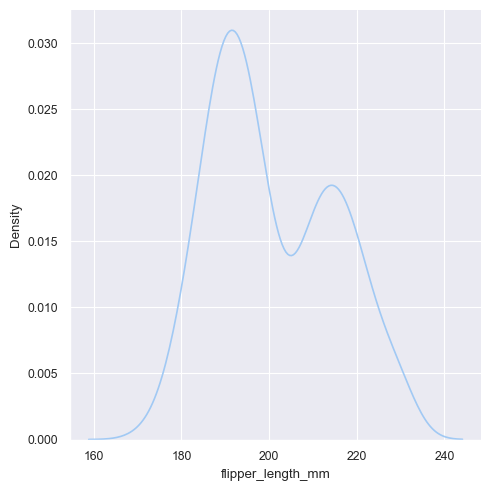

In [73]:
# kind 키워드 인수를 활용해서 기본적으로 표현되는 히스토그램의 종류를 kde로 변경했습니다.  
# Use the kind parameter to select a different representation
sns.displot(data=penguins, x="flipper_length_mm", kind="kde")

### 히스토그램 - displot() ecdf로 표현하기

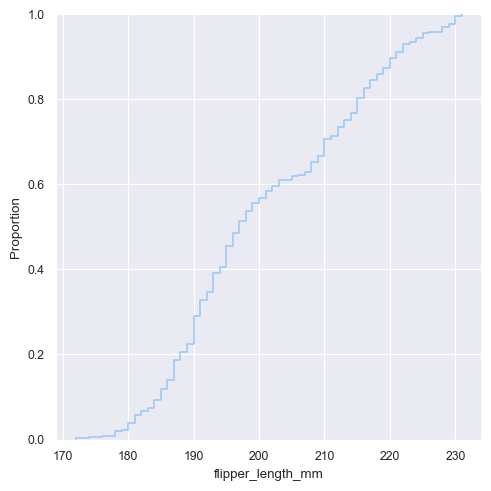

In [74]:
# There ar three main plot kinds;
# in addition to histograms and kernel density estimates(KDEs),
# you can also draw empirical cumulative distribution functions (ECDFs)
sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")
# ecdf(empirical cumulative distribution functions)를 kind 키워드 인수에 활용해서 
# 누적 분포 그래프로 표현합니다.

### 히스토그램 - displot() 히스토그램과 kde 동시에 표현하기

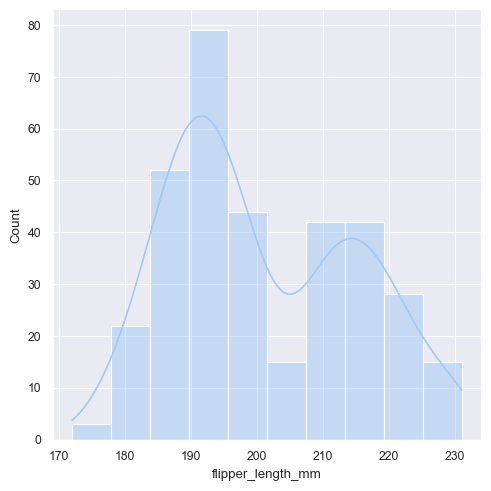

In [75]:
sns.displot(data=penguins, x="flipper_length_mm", kde=True)
# 두 가지 그래프 형식을 동시에 표현합니다. 

### 히스토그램 - displot() x, y 모두 값 할당하기

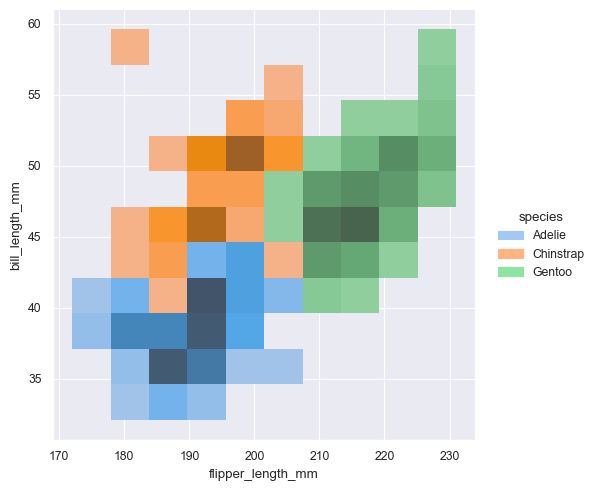

In [76]:
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
# displot도 히트맵 형태로 표현하는게 가능합니다.

### 히스토그램 - displot() 2개 값을 kde로 표현하기

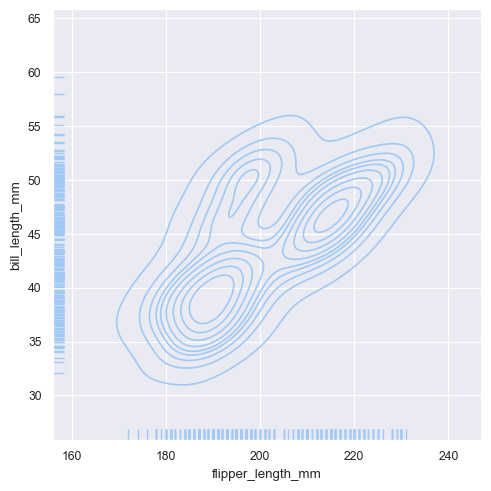

In [77]:
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde", rug=True)

### 히스토그램 - displot() hue로 subset 나누기

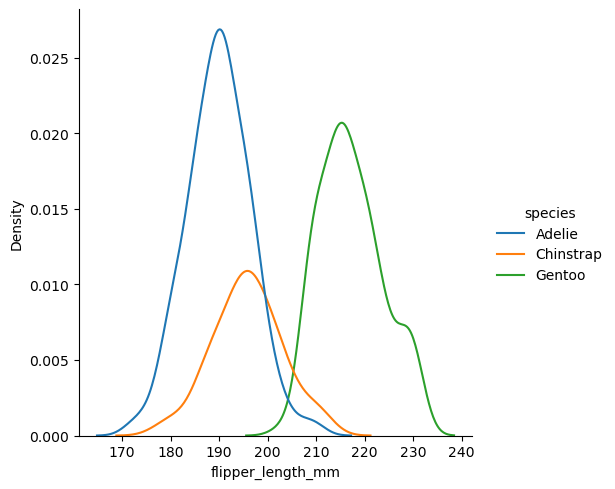

In [6]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")

### 히스토그램 - displot() col로 그래프 나누기

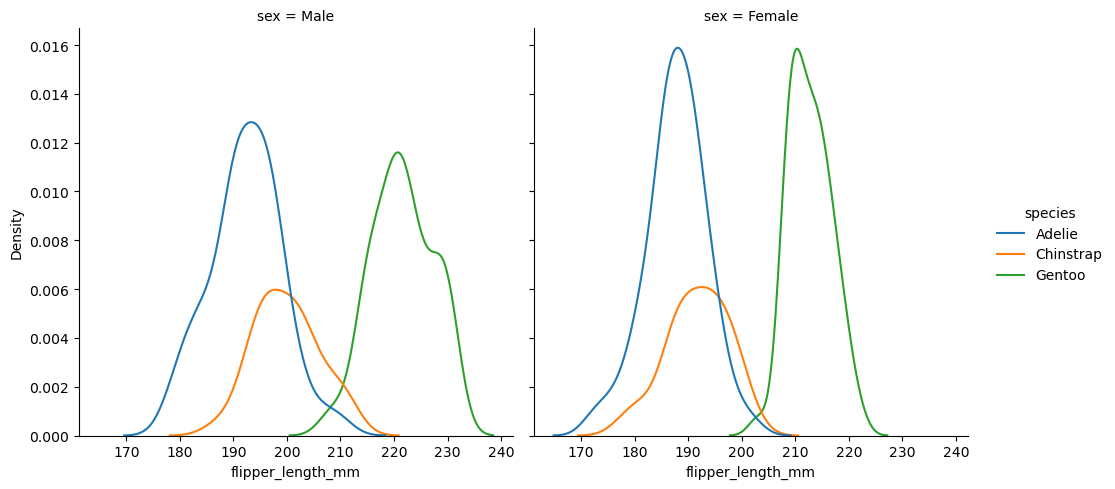

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="sex", kind="kde")

### 히스토그램 - displot() 그래프 크기 설정

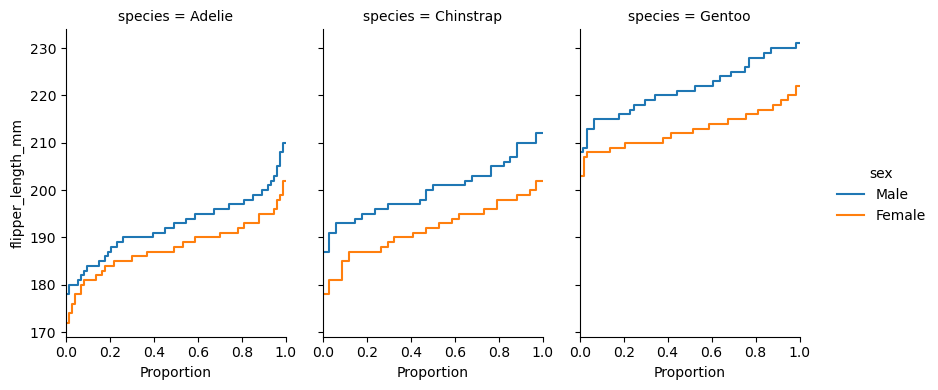

In [6]:
sns.displot(data=penguins, y="flipper_length_mm", hue="sex", col="species",
            kind="ecdf", height=4, aspect=.7)

### 히스토그램 - displot() col로 그래프 나누기

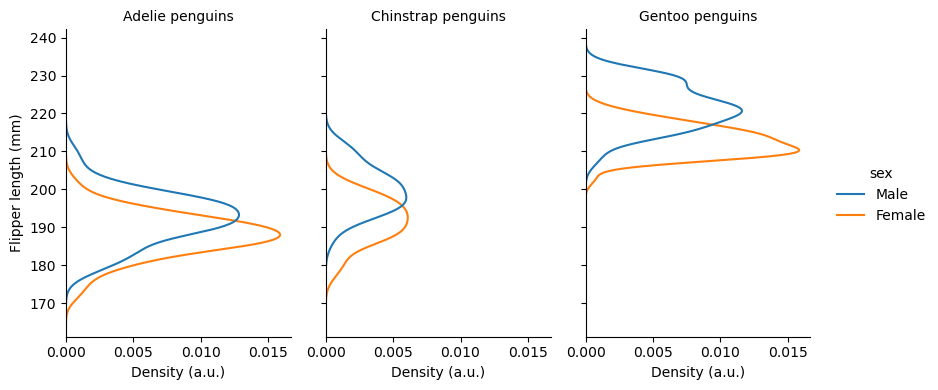

In [3]:
q = sns.displot(data=penguins, y="flipper_length_mm", hue="sex", col="species",
                kind="kde", height=4, aspect=.7)
q.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
q.set_titles("{col_name} penguins")

## 복습 끝

### barplot()
카테고리마다의 평균을 각 사각형의 길이로 편차를 error bar로 표현합니다. 첫번째 인수로 data를, 키워드 인수로 나머지를 전달합니다.

아래 코드는 x와 hue를 카테고리화 해서 body_mass_g 값의 평균과 신뢰구간(confidence intervals)을 구해서 표현하고 있습니다.

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

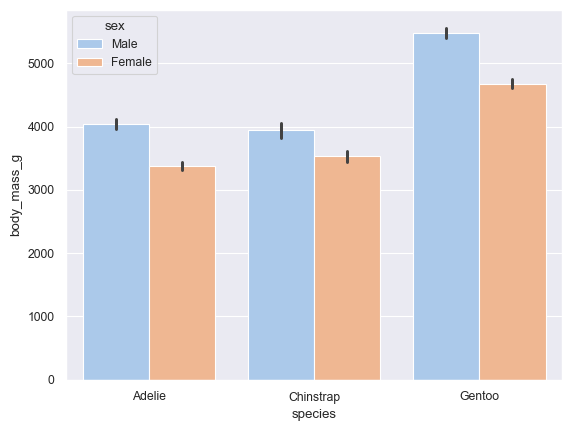

In [13]:
# Group by a categorical variable and plot aggregated values, with confidence intervals
# Add a second layer of grouping

df = sns.load_dataset("penguins")
sns.barplot(data=df, x="species", y="body_mass_g", hue="sex") # ci를 에러바로 표현해준다.

박스-휘스커 플롯(Box-Whisker Plot) 혹은 간단히 박스 플롯이라 불리는 이 플롯의 박스는 실수 값 분포에서 1 사분위 수(Q1)와 3 사분위 수(Q3)을 뜻합니다.  
이 3 사분위 수와 1 사분위 수의 차이를 IQR(interquartile range)라고 합니다. 박스 내부의 가로선은 중앙값을 나타냅니다. 박스 외부의 세로선은 1 사분위 수보다 1.5 x IQR 만큼 낮은 값과 3 사분위 수보다 1.5 x IQR 만큼 높은 값의 구간을 기준으로 그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분입니다. 그 바깥의 점은 아웃라이어(outlier)라고 부르는데 일일히 점으로 표시합니다.   
여기서 아웃라이어는 이상치입니다.

In [15]:
df = sns.load_dataset("titanic")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:xlabel='age'>

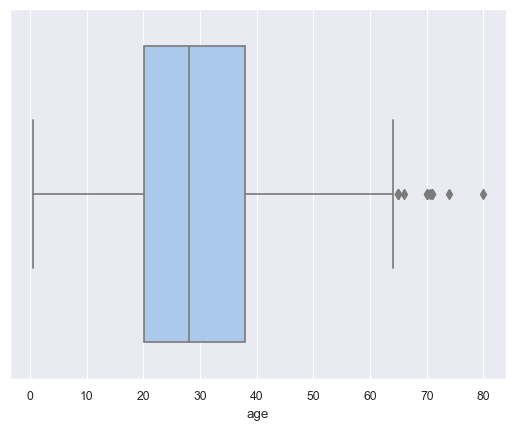

In [16]:
sns.boxplot(x=df['age']) # x 값으로 Series 만을 전달. 결과로 하나의 box plot을 수평하게 반환.
# 타이타닉호에 탑승한 사람들의 나이에 대한 4분위를 그래프로 표현

아래 코드에서 해당 데이터셋 중 class column의 dtype은 카테고리입니다. 이 카테고리화된 column을 하나의 분류 값으로 추가하기 위해 y 키워드 인수로 설정했습니다. 이렇게 하면 y축을 기준으로 카테고리별 box plot 을 unique한 value의 개수만큼 나눠서 얻을 수 있습니다.

<AxesSubplot:xlabel='age', ylabel='class'>

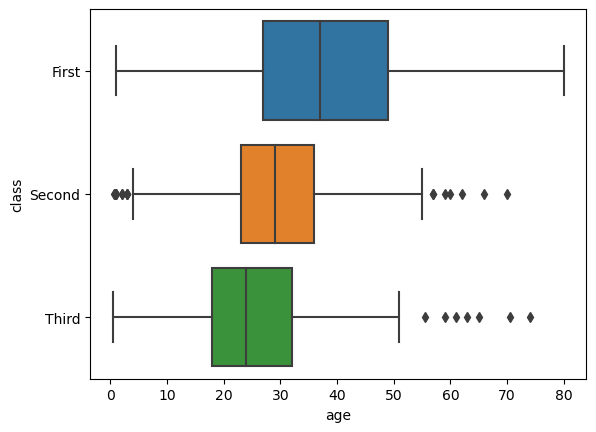

In [10]:
sns.boxplot(data=df, x="age", y='class')

<AxesSubplot:xlabel='age', ylabel='class'>

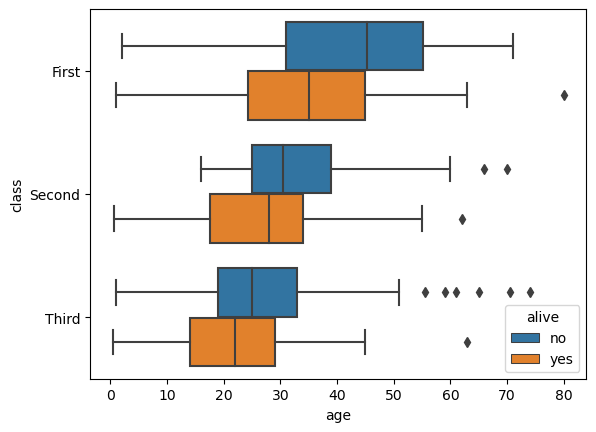

In [11]:
sns.boxplot(data=df, x="age", y='class', hue="alive") # hue로 한번 더 그룹화

그래프의 순서가 맘에 안들 땐 order keyword parameter로 전달할 값을 리스트 형태로 작성하면 되는데, 원하는 차례로 ticklabel을 적으면 됩니다.

<AxesSubplot:xlabel='fare', ylabel='alive'>

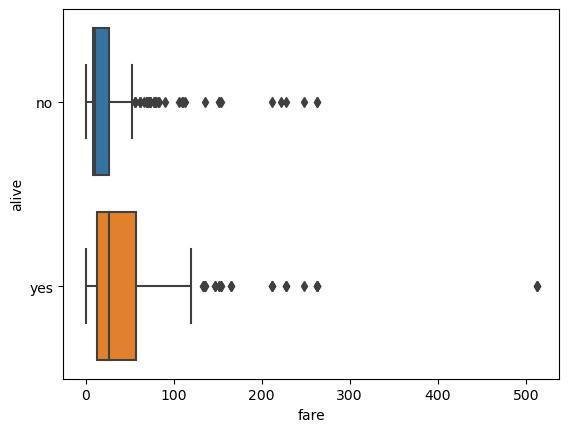

In [12]:
sns.boxplot(data=df, x="fare", y="alive")

<AxesSubplot:xlabel='fare', ylabel='alive'>

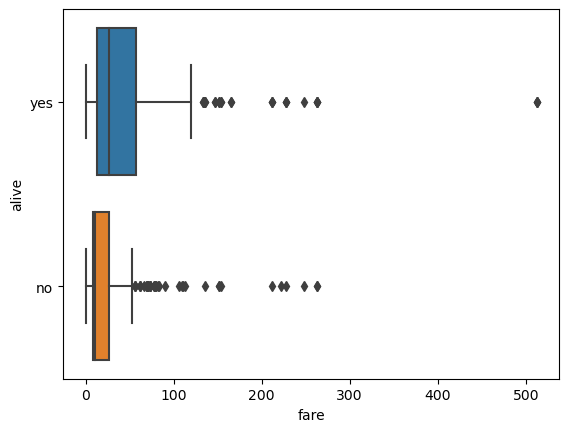

In [13]:
sns.boxplot(data=df, x="fare", y="alive", order=["yes", "no"]) # 카테고리에 써야한다. 원하는 차례로 ticklabel을 적으면 된다.

수치 값을 갖는 column 여럿을 동시에 하나의 box plot에 표현할 수 있습니다. data 키워드 인수로 DataFrame 을 전달할 때 그래프로 표현하고 싶은 수치 값을 갖는 column 들을 인덱싱해서 DataFrame 형태로 전달하면 됩니다.  
만약 box plot의 방향을 바꾸고 싶으면 orient keyword parameter에 h(수평), v(수직)를 줘서 설정하면 됩니다

<AxesSubplot:>

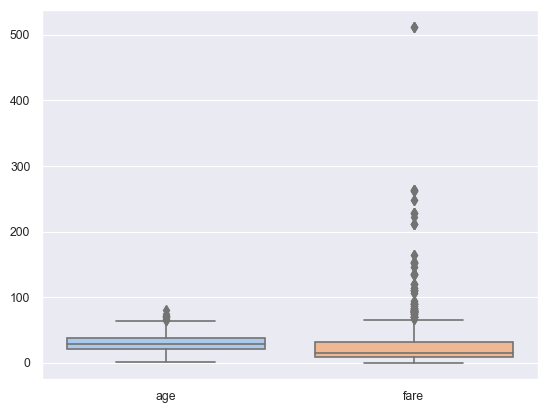

In [17]:
sns.boxplot(data=df[["age", "fare"]], orient="v") 

## violinplot()
box plot과 kde(커널 밀도 함수) 둘을 콤비네이션한 그래프입니다. 그런데 마치 그 생김새가 바이올린 같다하여 violin plot이라고 불립니다. 세로 방향으로 kde의 모양을 그리는데 kde가 좌우 대칭되게 그려집니다.  
그 규칙은 box and whisker plot과 비슷합니다. 하나 이상의 카테고리 column을 가지고 데이터의 분포를 나란히 그립니다. 그래서 그 그래프들의 분포를 비교하기에 적합합니다. 샘플 사이즈에 따라 분포에 영향이 있을 수 있으므로 그 점을 참고해서 사용해야 합니다.

<AxesSubplot:xlabel='age'>

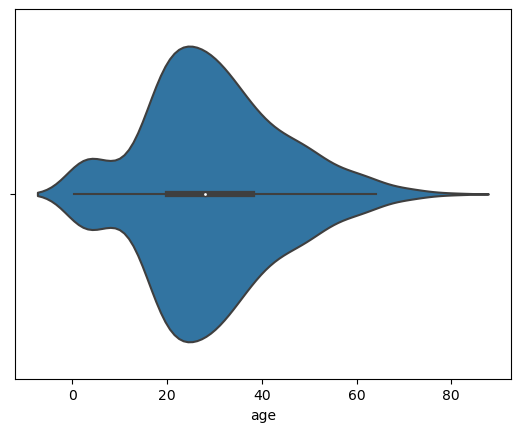

In [15]:
# violinplot()
# 하나 이상의 카테고리 column을 가지고 데이터의 분포를 나란히 그린다.

df = sns.load_dataset("titanic")
sns.violinplot(x=df["age"]) # x 키워드 인수만 값을 Series로 할당

각 카테고리마다 갖는 데이터 분포를 y축을 기준으로 하여 분리하는걸 확인합시다. x축에 수평하게 그래프를 그려내고 있습니다.

<AxesSubplot:xlabel='age', ylabel='class'>

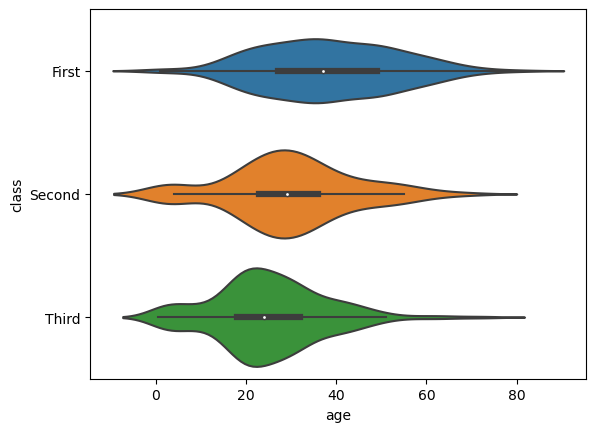

In [47]:
sns.violinplot(data=df, x='age', y='class')

x 키워드 인수에 카테고리 자료형을 설정해보겠습니다. 이에 따라 violin plot의 방향이 
vertical 하게 변경된 것을 확인할 수 있습니다.

<AxesSubplot:xlabel='class', ylabel='age'>

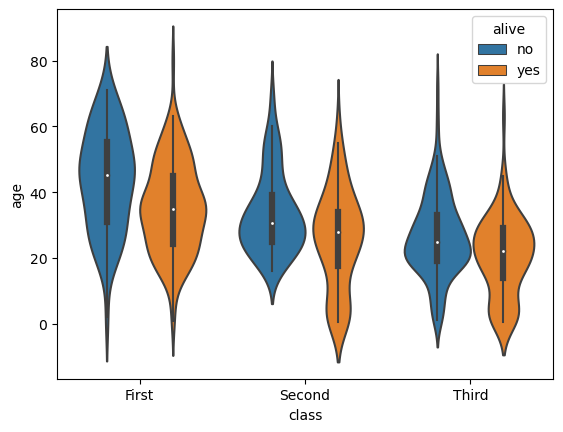

In [48]:
sns.violinplot(data=df, x="class", y="age", hue="alive")

아래는 hue에 설정한 alive column의 값에 따라 좌측, 우측 각각 분포를 그려내고 있습니다.  
이 코드가 잘 작동하기 위해서 split 키워드 인수에 True 값을 전달하는 조건으로 hue에 설정된 값의 level이 단 두개여야 합니다.  
현재 hue에 설정된 alive가 갖는 값이 ‘yes’와 ‘no’ 단 두개이기 때문에 split 키워드 인수에 True 설정이 가능합니다.

<AxesSubplot:xlabel='deck', ylabel='age'>

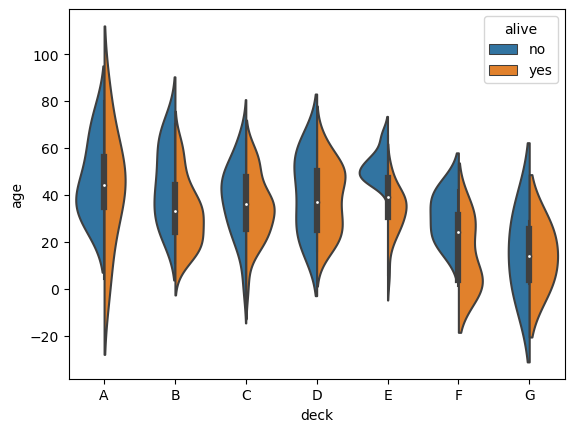

In [49]:
sns.violinplot(data=df, x="deck", y="age", hue="alive", split=True)

hue 의 level 이 정확히 2개가 아니라면?

In [3]:
sns.violinplot(data=df, x="deck", y="age", hue="", split=True)  # split 키워드 인수 값을 True로 하고 싶다면 반드시 hue에 오는 column의 값이 단 2가지만으로 분류되어야 한다.

ValueError: There must be exactly two hue levels to use `split`.'

violin plot을 표현할 때 범위를 제한할 수 있습니다. 타이타닉호 데이터셋에서 나이의 경우에 0 미만의 범위에 대해 그래프가 표현될 수 있습니다. 나이의 데이터 특성상 음수는 있을 수 없기 때문에 이런 표현은 바람직하지 않습니다.

<AxesSubplot:xlabel='age', ylabel='alive'>

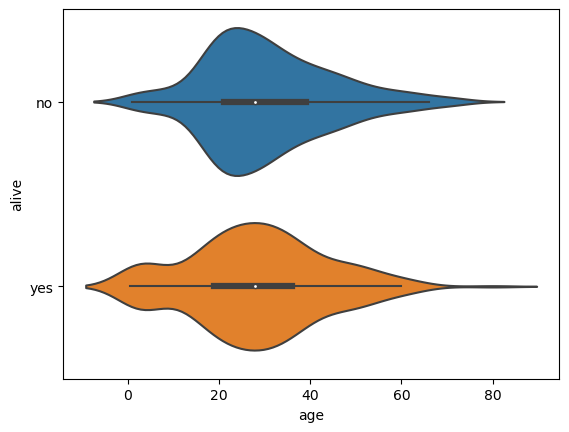

In [53]:
sns.violinplot(data=df, x="age", y="alive")

값의 표현 범위를 명확히 하기 위해서 cut이라는 키워드 인수를 사용할 수 있습니다.

<AxesSubplot:xlabel='age', ylabel='alive'>

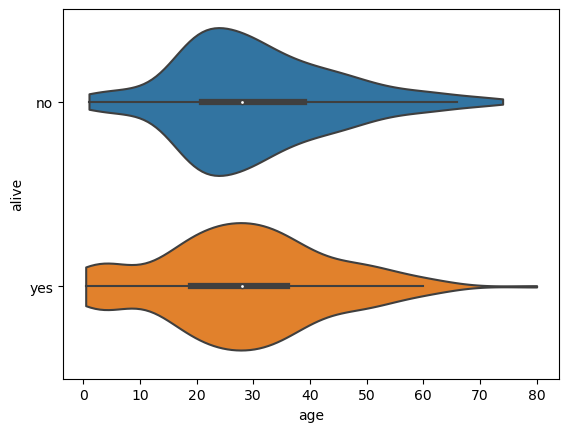

In [54]:
sns.violinplot(data=df, x="age", y="alive", cut=0) # cut 키워드 인수에 0 값을 작성하면 가지고 있는 데이터 범위를 초과해서 그래프가 표현되지 않는다, 0 이외의 실수 값을 입력하면 대역폭의 크기가 된다.

kde의 그래프 모양을 부드럽게 처리하다보면 대역폭의 크기가 커집니다. 이를 줄이기 위해선 bw 키워드 인수에 소수 값을 갖는 비율을 설정해주면 됩니다.

<AxesSubplot:xlabel='age', ylabel='alive'>

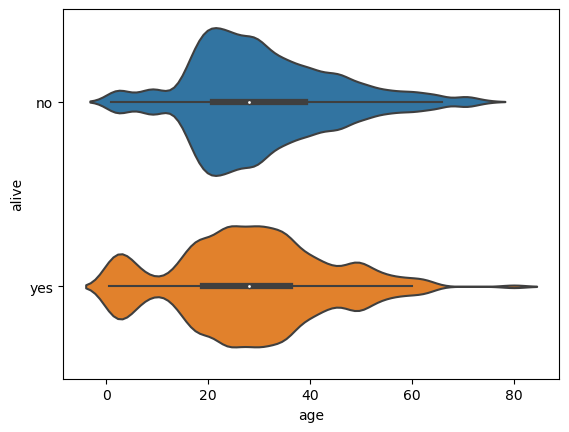

In [4]:
# Use a narrower bandwidth
sns.violinplot(data=df, x="age", y="alive", bw=.15)

violin plot 내부에 데이터의 분포를 직접적으로 표현할 수도 있습니다.  
inner 키워드 인수에 stick이란 값을 전달하면 됩니다. 아래의 예제를 보면 inner 키워드 인수에 stick이란 값을 전달하여 데이터의 분포를 그래프 안에 표현했습니다.

<AxesSubplot:xlabel='age', ylabel='embark_town'>

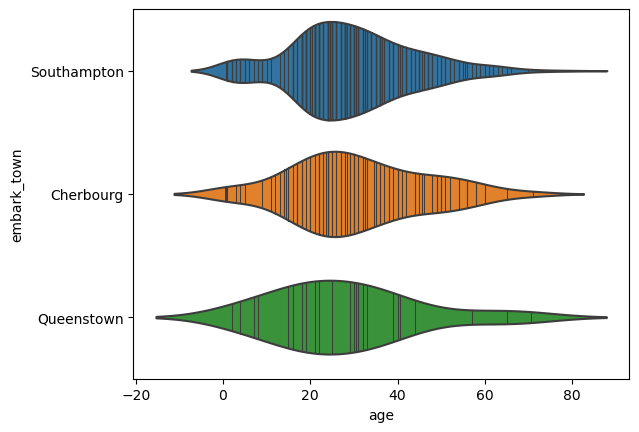

In [56]:
sns.violinplot(data=df, x="age", y="embark_town", inner="stick") # violinplot 내부에 표현

scale에 따라 각 그래프의 크기가 달라집니다. scale은 총 area, count, width의 값을 
지정할 수 있으며 기본 값은 area입니다. area는 violin의 영역 너비가 같게 그려집니다.  
count는 실제 갖는 데이터 개수에 따라 그 violin의 크기가 달라집니다. width는 violin이 동일한 폭을 갖게 됩니다.

<AxesSubplot:xlabel='age', ylabel='embark_town'>

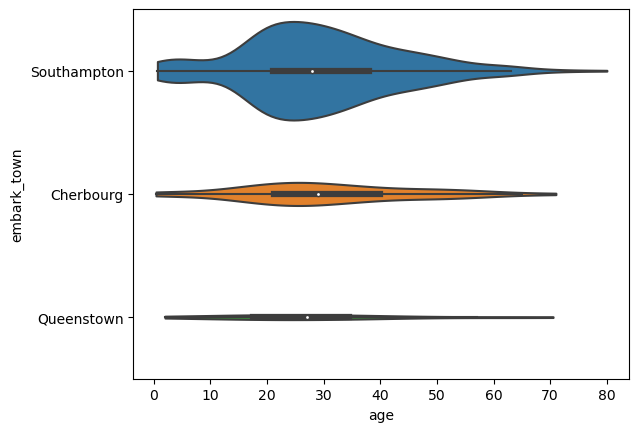

In [57]:
sns.violinplot(data=df, x="age", y="embark_town", scale="count", cut=0)

## stripplot()
strip plot은 카테고리마다의 scatter plot을 그립니다.  
그리는 방식으론 jitter를 사용하는데 이 방식은 다른 축의 방향으로 랜덤하게 점을 찍어 겹치는 부분을 줄입니다.  
이 방식은 box plot과 violin plot의 보완이될 수 있습니다.

단 하나의 숫자형 column을 할당한 경우에는 각 점들이 다른 축의 방향으로 랜덤하게 “jittered”된 단일 변량에 대한 분포(univariate distribution)의 형태를 보여줍니다.

<AxesSubplot:xlabel='total_bill'>

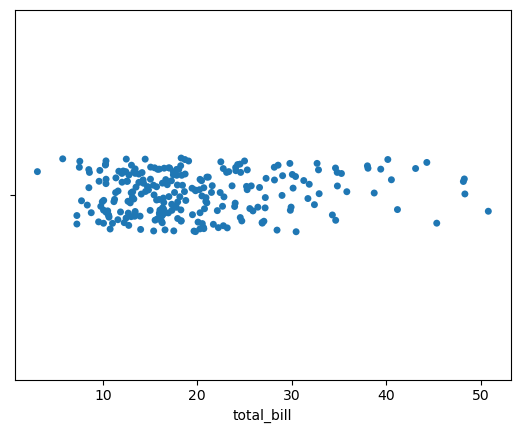

In [58]:
# stripplot()
# 카테고리마다의 scatter plot을 그린다. 각기 다른 축의 방향으로 랜덤하게 흩뿌려주는 방식으로 겹치는 걸 줄인다.

tips = sns.load_dataset("tips")
sns.stripplot(data=tips, x="total_bill")

<AxesSubplot:xlabel='total_bill', ylabel='day'>

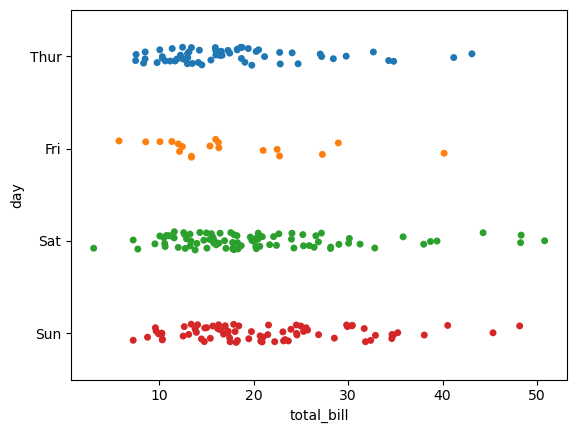

In [59]:
sns.stripplot(data=tips, x="total_bill", y="day")  # y축 방향에 카테고리 변량을 추가해 각 카테고리에 해당하는 데이터들의 분포 형태를 비교할 수 있게 출력한다.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

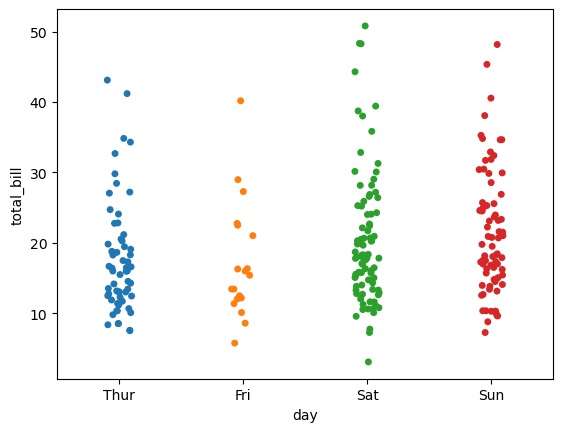

In [60]:
sns.stripplot(data=tips, y="total_bill", x="day")  # 축을 변경해 vertical 한 모양으로 출력

hue 키워드 인수를 추가해서 변량을 하나 더 추가할 수 있습니다. 그럼 분류의 개수가 더 늘어 그래프를 쉽게 파악하는데 도움이 될 수 있습니다.

<AxesSubplot:xlabel='total_bill', ylabel='day'>

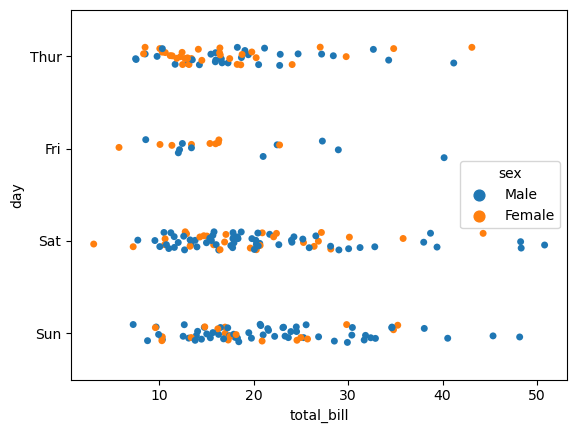

In [61]:
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex")

hue 키워드 인수에 카테고리 column이 아닌 이산형 숫자 타입의 데이터를 갖는 column도 지정할 수 있습니다.

<AxesSubplot:xlabel='total_bill', ylabel='day'>

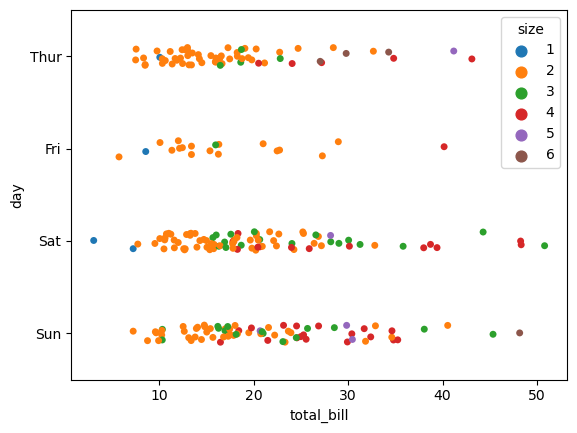

In [62]:
sns.stripplot(data=tips, x="total_bill", y="day", hue="size")

아래의 예제처럼 dodge=True 키워드 인수를 통해 hue로 나눈 카테고리 값을 완전히 분리시켜 그래프로 표현할 수도 있습니다.

<AxesSubplot:xlabel='total_bill', ylabel='day'>

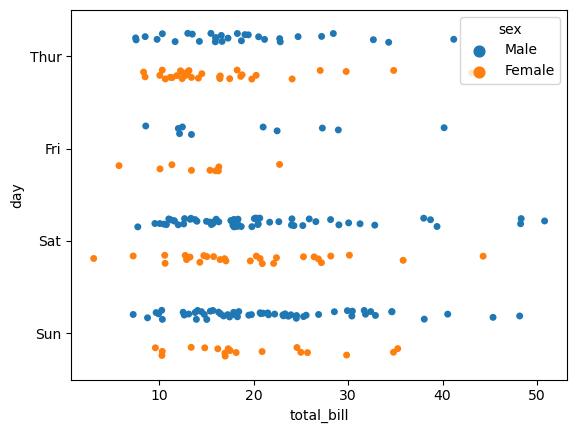

In [63]:
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True)

## swarmplot()
숫자 값을 갖는 데이터의 단일 변량의 분포를 swarm plot으로 표현하고 있습니다. 아래 
그래프에서도 살펴볼 수 있듯이 각각의 데이터 마커가 서로 겹치지 않게 표현하고 
있습니다.

<AxesSubplot:xlabel='total_bill'>

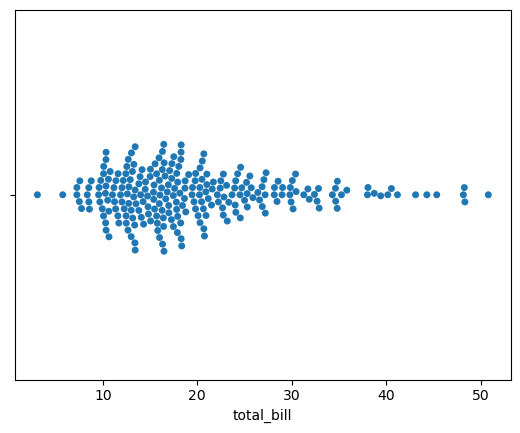

In [64]:
# swarmplot()
# stripplot과 매우 흡사하지만 데이터를 마커로 표현할 때 절대 겹치지 않게 표현한다는 점이 다르다.  
# 정확한 데이터의 분포를 표현하는 용도로 더 없이 좋은 그래프이지만, 아주 큰 스케일의 데이터를 표현하기에는 필요한 너비가 그만큼 넓어지기 때문에 적합하지 못하다.

tips = sns.load_dataset("tips")
sns.swarmplot(data=tips, x="total_bill")

y값에 카테고리 자료형을 갖는 column을 추가함으로써 각 카테고리마다의 swarm plot으로 쪼갰습니다. 아래 예제에서는 각 요일별 총 지출액에 대한 분포를 나타내고 있습니다.

<AxesSubplot:xlabel='total_bill', ylabel='day'>

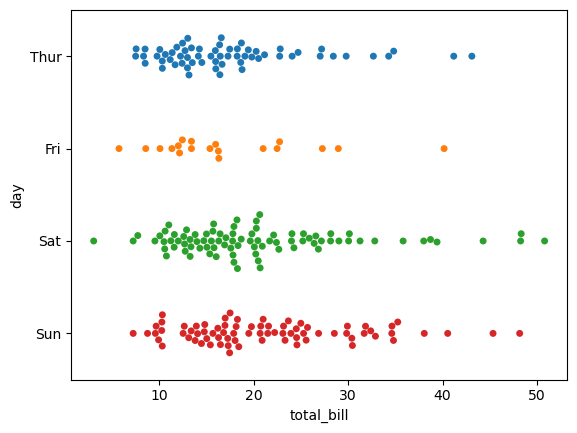

In [65]:
sns.swarmplot(data=tips, x="total_bill", y="day")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

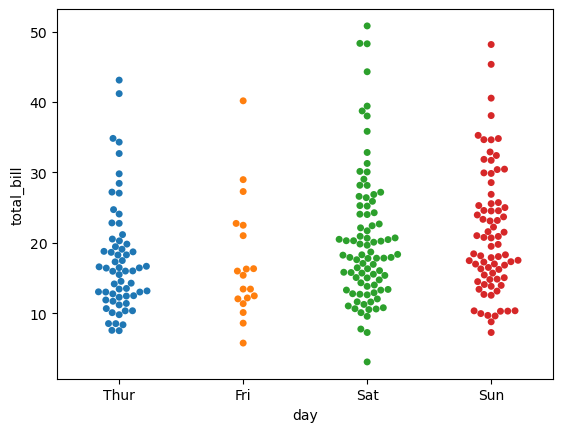

In [66]:
sns.swarmplot(data=tips, x="day", y="total_bill") # vertical 방향으로 표현

hue 키워드 인수를 추가해서 변량을 하나 더 추가할 수 있습니다. 그럼 분류의 개수가 더 늘어 그래프를 쉽게 파악하는데 도움이 될 수 있습니다.

<AxesSubplot:xlabel='total_bill', ylabel='day'>

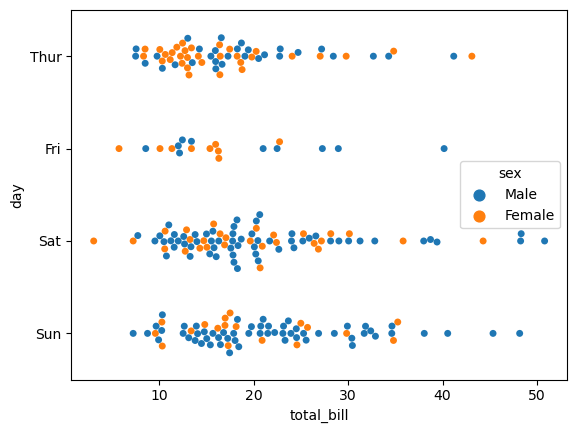

In [67]:
sns.swarmplot(data=tips, y="day", x="total_bill", hue="sex")

아래의 예제처럼 dodge=True 키워드 인수를 통해 hue로 나눈 카테고리 값을 완전히 
분리시켜 그래프로 표현할 수도 있습니다.  
하지만 앞의 strip plot과 다르게 swarm plot은 그래프의 크기가 데이터를 표현할만큼 충분히 크지 않으면 표현에 생략된 마커가 발생될 수 있습니다.

C:\Users\PlayData\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='total_bill', ylabel='day'>

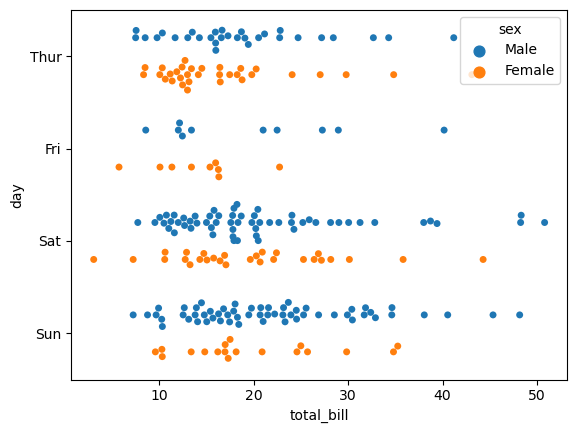

In [68]:
sns.swarmplot(data=tips, y="day", x="total_bill", hue="sex", dodge=True)

scatter() 메서드의 키워드 인수를 작성해서 사용자가 원하는 시각적 효과를 커스텀하게 
적용시킬 수 있습니다.

C:\Users\PlayData\anaconda3\lib\site-packages\seaborn\categorical.py:1378: UserWarning: You passed a edgecolor/edgecolors ('#3d3d3d') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(swarm_data, cat_pos, s=s, **kws)


<AxesSubplot:xlabel='total_bill', ylabel='day'>

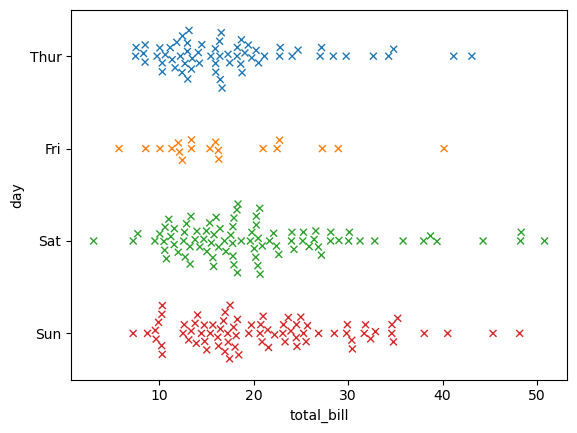

In [69]:
sns.swarmplot(data=tips, y="day", x="total_bill", marker="x", linewidth=1)

## catplot()
categorical plot인 catplot은 axes-level(row, col)까지 분류를 나눌 수 있습니다. 즉 catplot은 카테고리화를 더 세분화해서 작업할 수 있는 플롯입니다.  
뿐만 아니라 kind 키워드 인수를 사용하면 axes-level에 사용할 그래프의 유형을 선택할 수 있습니다.

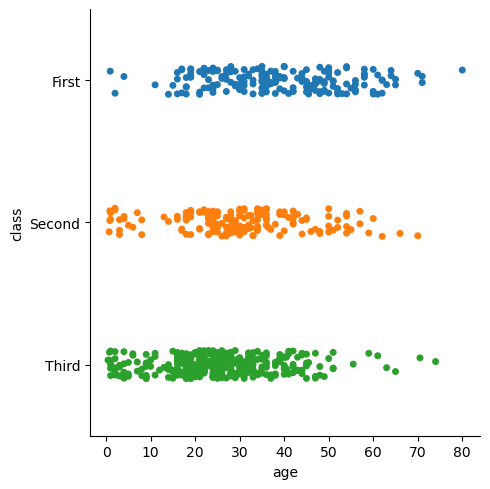

In [71]:
# kind를 선택하지 않으면
df = sns.load_dataset("titanic")
sns.catplot(data=df, x="age", y="class")  # jitterd strip plot의 결과를 보여준다.
# jittered strip plot은 각 축을 기준하여 데이터의 분포를 점으로 표현하는데, 
# 이때 점들이 최대한 겹치지않도록 세로 방향으로 무작위로 위치를 찍어주는 플롯입니다.

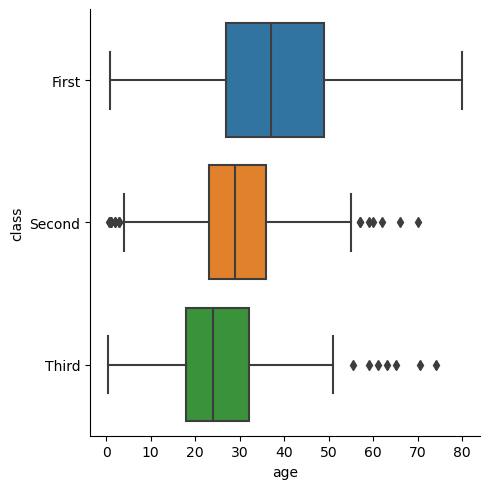

In [72]:
sns.catplot(data=df, x="age", y="class", kind="box") # box plot 으로 표현

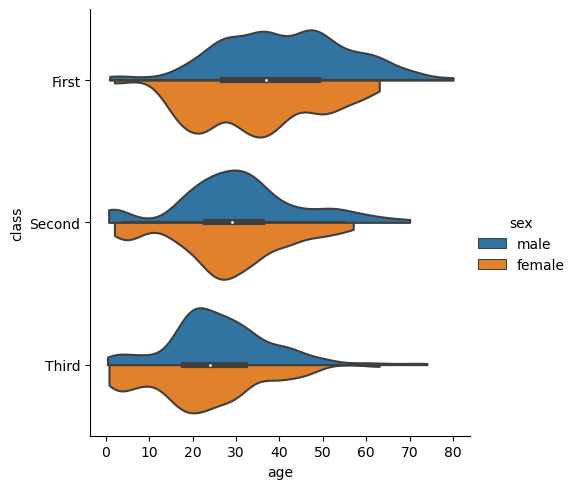

In [73]:
# kind를 violin으로 하면 violin plot 처럼 바이올린 모양의 커널 밀도 히스토그램을 그려줍니다.

sns.catplot(data=df, x="age", y="class", hue="sex",
            kind="violin", bw=.25, cut=0, split=True)

# hue를 sex column에 따라 분류했고 split 키워드 인수에 True 값을 전달했기 때문에 
# 가운데를 기준으로 성별에 따라 커널 밀도 함수가 표현되어 비대칭되게 표현되고 
# 있습니다.

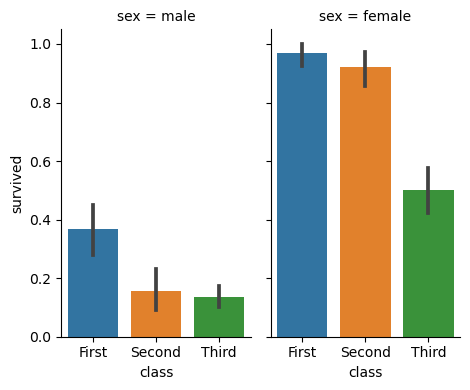

In [77]:
sns.catplot(data=df, x="class", y="survived", col="sex",
            kind="bar", height=4, aspect=.6)

# 이번엔 kind를 bar plot으로 하고 있습니다.
# 그런데 더 주목할 점은 axes가 2개인 것처럼 표현됐다는 것입니다. 
# col 키워드 인수에 sex column name을 설정하였기에 sex 분류에 따라 
# 그래프가 col 단위로 쪼개졌습니다. 
# 그래서 axes-level 단위로 분류 가능하다고 하는 것입니다.

연속해서 그래프를 그리는 메서드를 여러 차례 사용하면 그에 해당하는 그래프 레이어가 겹쳐서 보이게 됩니다.  
swarmplot은 jittered strip plot과 흡사해보이지만 다릅니다.  
jittered strip plot은 병렬한 방향이지만 정해진 범위 내에 랜덤하게 찍어서 최대한 겹치지 않게 한 방식이고, swarmplot은 완전히 겹치지 않게 병렬로 점을 찍어 표현하는 방식입니다.

<AxesSubplot:xlabel='age', ylabel='class'>

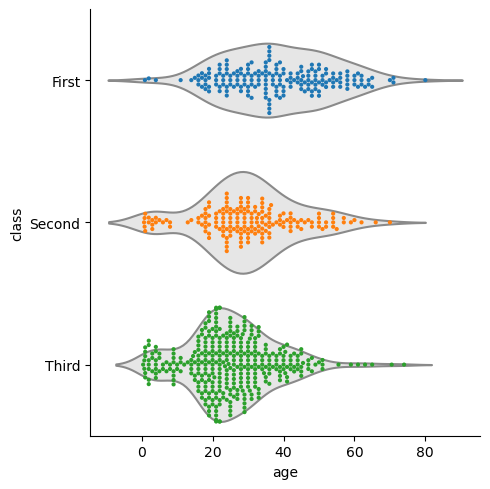

In [78]:
sns.catplot(data=df, x="age", y="class", kind="violin", color=".9", inner=None)
sns.swarmplot(data=df, x="age", y="class", size=3)

## jointplot()
두 개의 변수의 분포를 나타낼 때 활용하면 좋은 플롯입니다. histogram과 scatter plot을 동시에 사용해서 시각적 효과를 표현합니다.

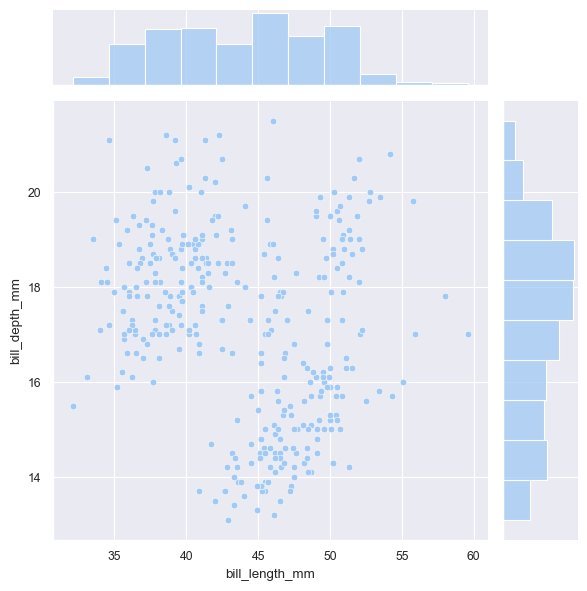

In [19]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

# data 키워드 인수로 penguins의 DataFrame을 전달합니다. 
# x에는 DataFrame의 column name인 bill_length_mm, y에는 DataFrame의 
# column name인 bill_depth_mm을 전달하고 있습니다.

# histplot()과 scatterplot()을 동시에 사용해서 데이터의 분포를 더 자세하고 직관적으로 
# 파악해볼 수 있습니다. 하지만 아래 차트로는 어떤 특징을 찾기 어렵습니다.

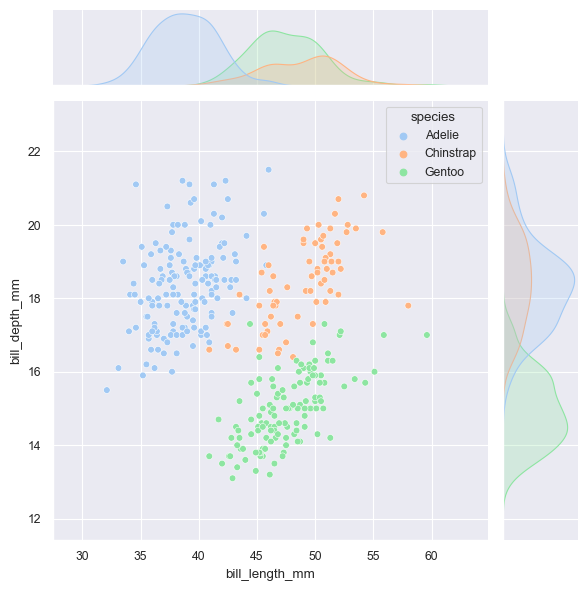

In [20]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

# hue 키워드 인수를 활용하여 species column에 대한 변수를 하나 더 추가했습니다.
# 앞의 그래프와 달리 scatter plot에 species별로 색상이 다르게 
# 적용되었고 히스토그램으로 표현된 분포가 자동적으로 kde로 변경된 
# 것을 확인할 수 있습니다.
# 펭귄의 종에 따른 분포가 나뉘는 것을 시각적으로 쉽게 확인할 수 
# 있게 되었습니다. 

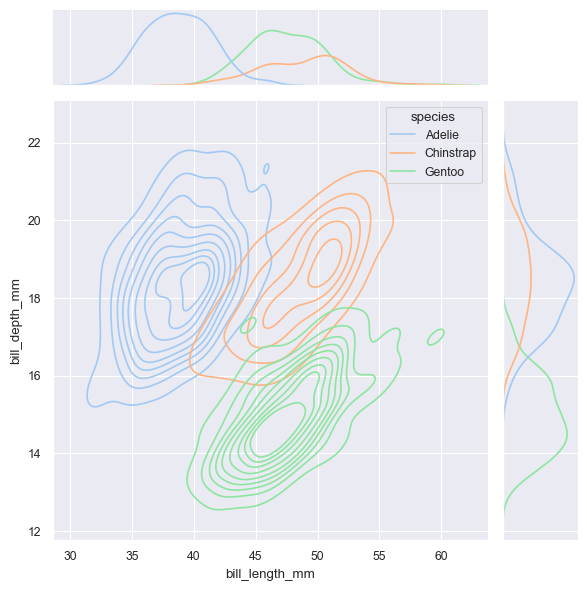

In [21]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

# kind 키워드 인수를 하나 추가하고 그 값으로 kde를 전달했습니다. 
# 그 결과로 scatter 분포가 kde의 형태를 띄면서 값의 밀도가 더 눈에 
# 잘 보이도록 변경된 것을 확인할 수 있습니다.

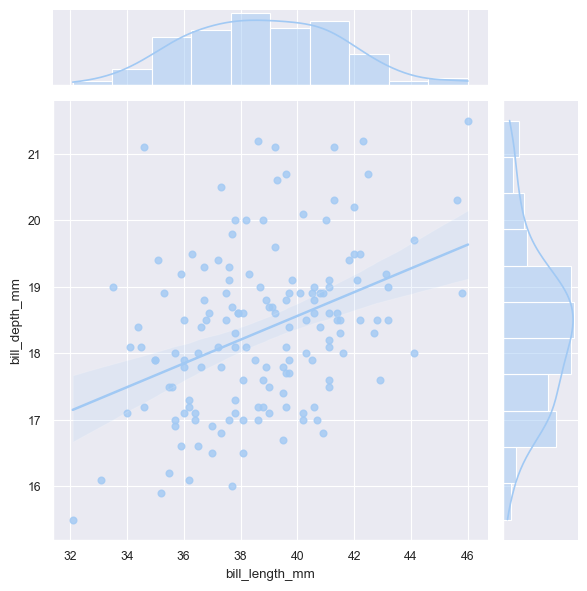

In [22]:
# kind 키워드 인수에 reg 값을 전달해서 선형 회귀에 대한 결과를 
# 그래프로 바로 볼 수 있습니다. 이 코드에서는 아델리 펭귄에 
# 대한 데이터를 추린 후 아델리 펭귄의 부리에 대한 선형 결과를 구해보았습니다. 
# hue와 kind=’reg’는 동시에 사용될 수 없는 옵션입니다.

adelie_penguins = penguins[penguins["species"] == 'Adelie']
sns.jointplot(data=adelie_penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg") # kind 인수에 reg 값 -> 선형 회귀에 대한 결과를 그래프로

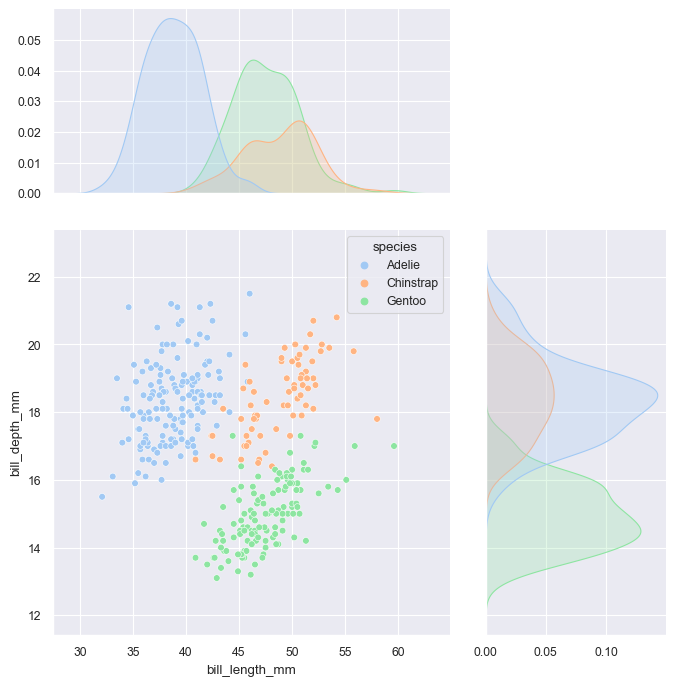

In [23]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", 
height=7, ratio=2, marginal_ticks=True)

# height, ratio, marginal_ticks키워드 인수를 추가했습니다. 
# 이 인수를 활용하여 전체 그래프의 크기(height), main과 marginal 
# 그래프 간의 비율(ratio), marginal histogram에 ticks을 표현할지 
# 조절할 수 있습니다. 

## pairplot()
데이터셋 내의 각 column마다 pair로 경우에 수에 따라 묶고 그에 따른 결과를 일목요연하게 한번에 확인할 수 있는 플롯입니다.  
pairplot()으로 서로 다른 column 간에 비교할 때 가장 단순하게 적용하기 좋은 
것이 scatterplot()입니다.  
같은 column이 겹치는 위치에는 histplot()의 결과를 보여줘서 값의 밀도가 어떻게 
되는 지 보여줍니다.

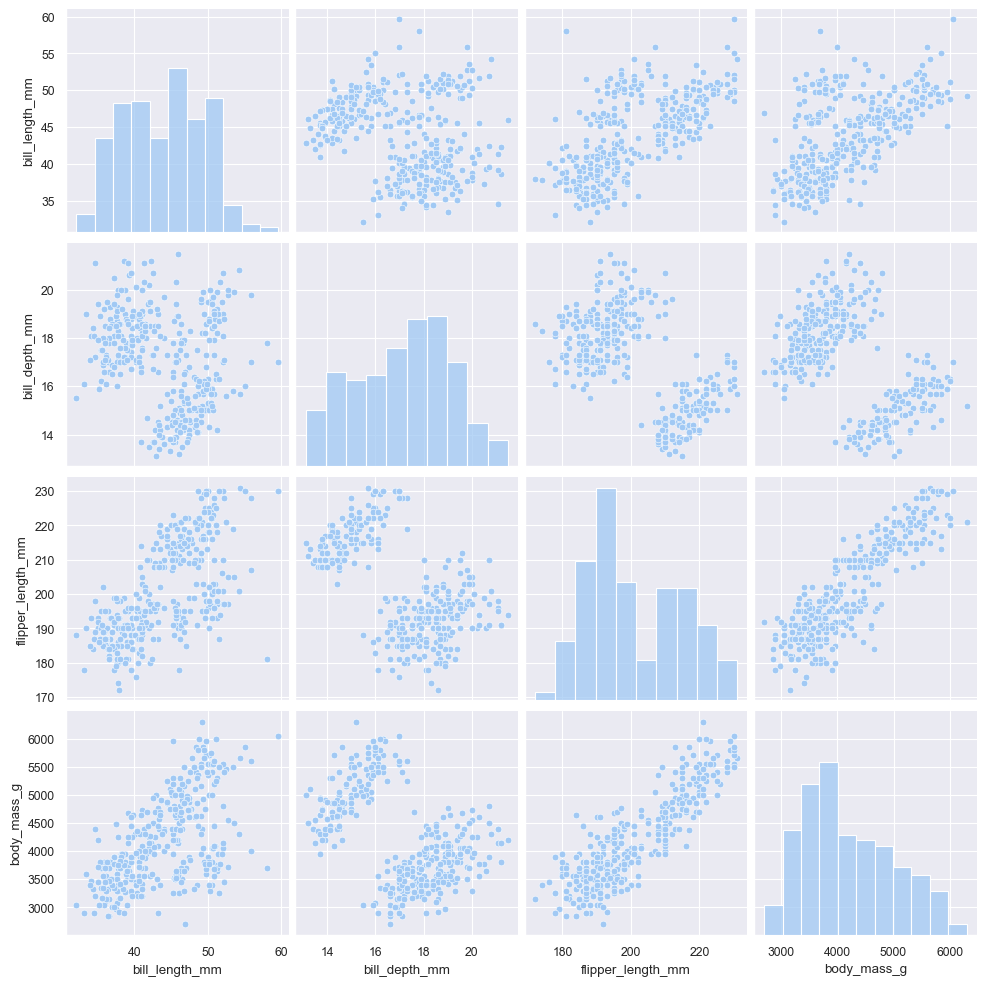

In [8]:
sns.pairplot(penguins)

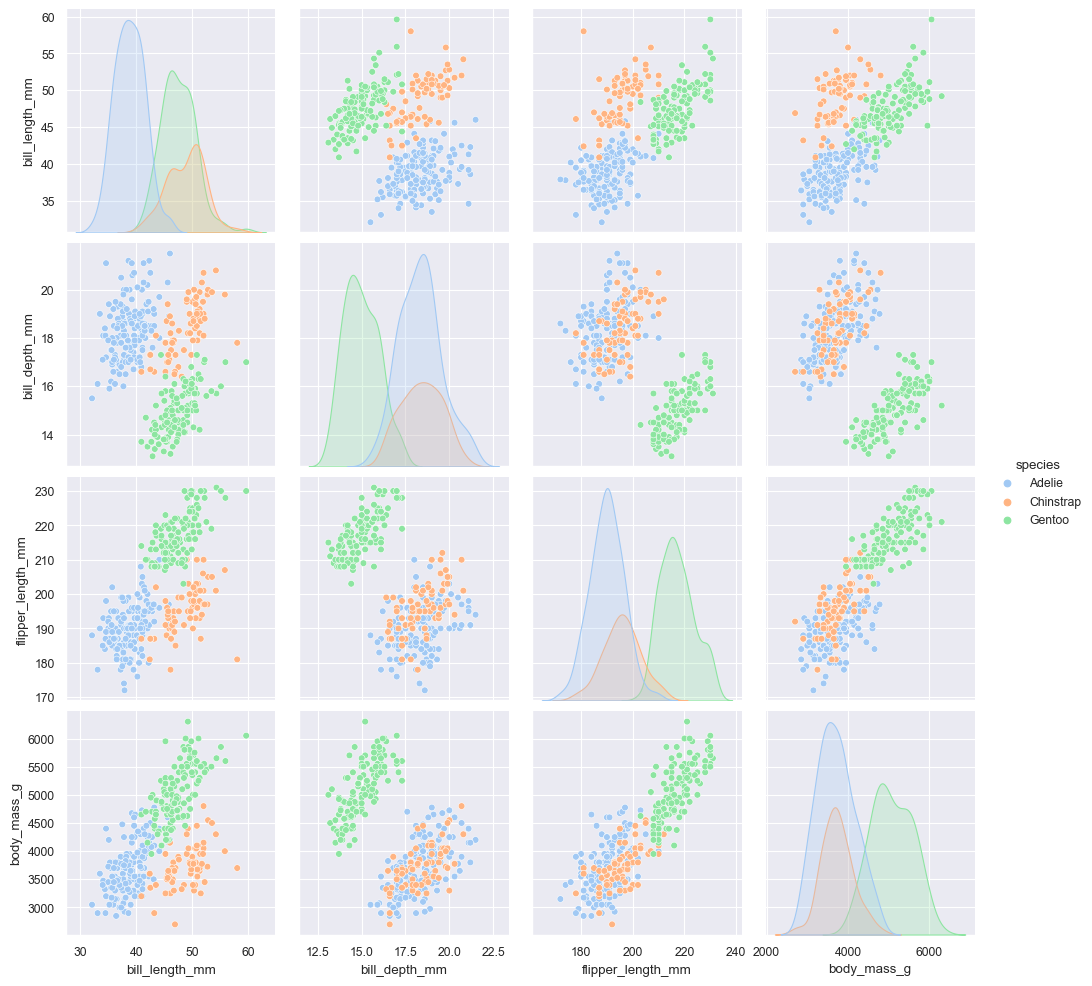

In [9]:
sns.pairplot(penguins, hue="species")

# 의미 있는 관계로 엮기 위해서 hue 키워드 
# 인수에 species를 전달하여 펭귄의 종마다 어떤 분포를 갖는지 분류를 하였습니다.
# joint plot 때와 같게 자동적으로 형태가 kde로 변경된 것을 확인할 수 있습니다.

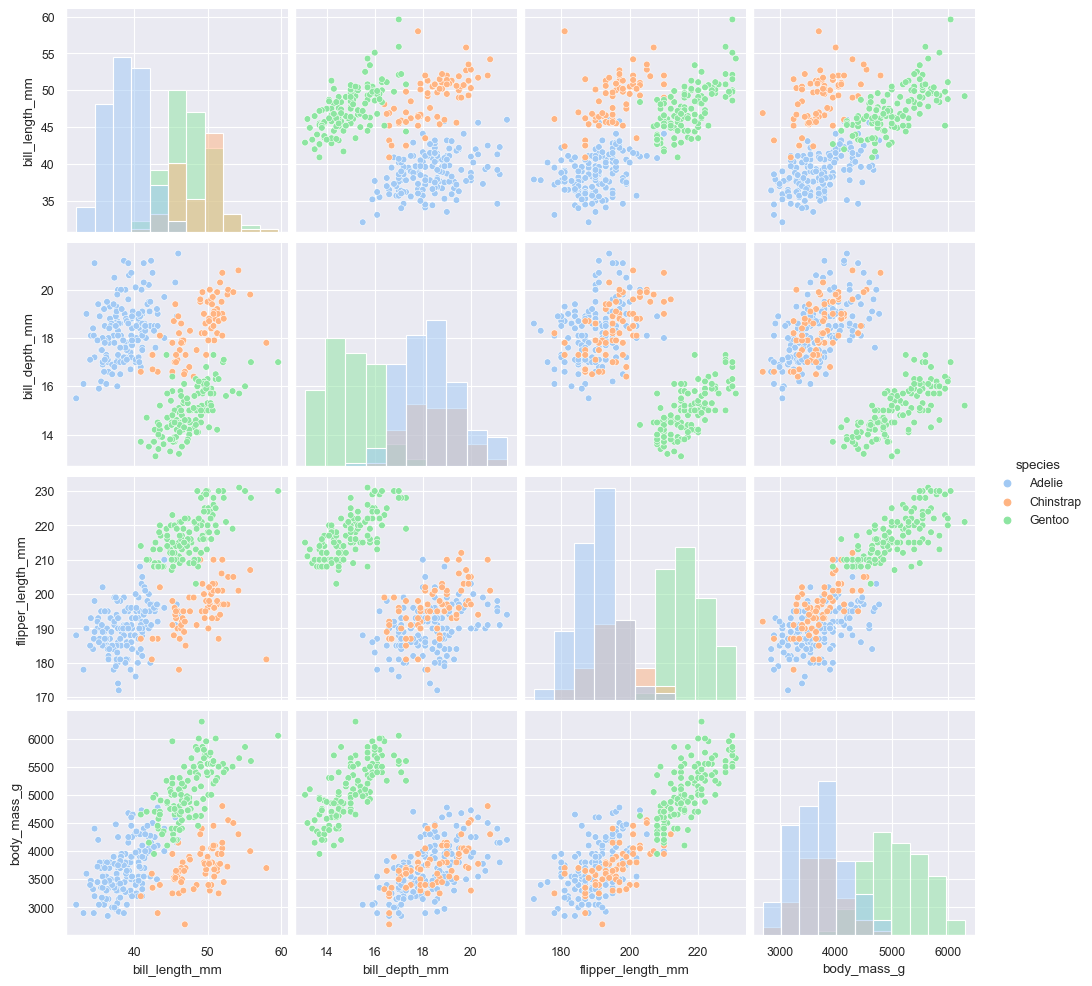

In [10]:
# kde가 아닌 histogram으로 표현할 수도 있습니다. diag_kind 키워드 
# 인수를 사용하면 됩니다.histogram을 의미하는 hist 문자열을 
# 값으로 전달하면 됩니다.

sns.pairplot(penguins, hue="species", diag_kind="hist")

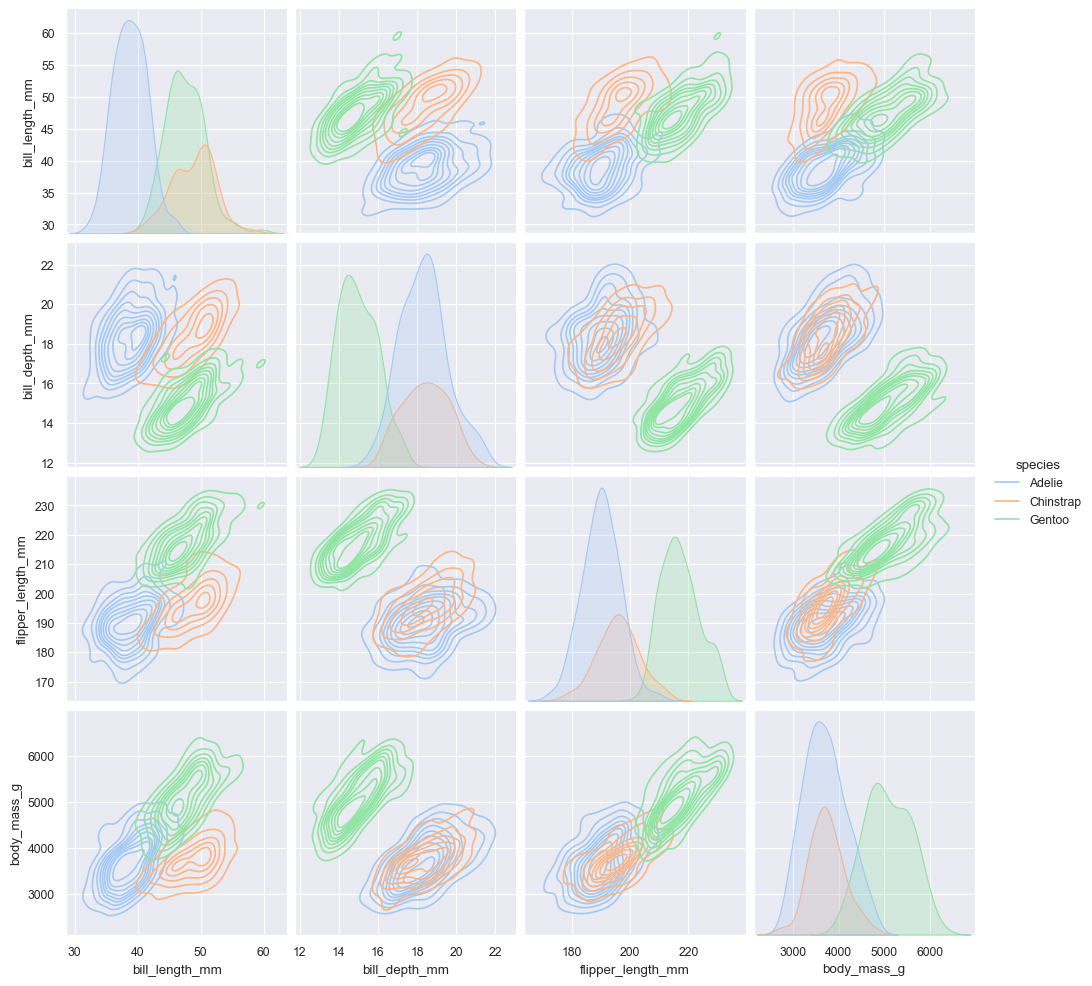

In [11]:
# 다른 column과의 비교하는 영역의 플롯의 종류도 변경할 수 있습니다.
# 여기서는 kind라는 키워드 인수에 kde를 전달하여 서로 다른 column 간에 결과를 
# 더 보기좋게 비교할 수 있게 하였습니다.

sns.pairplot(penguins, hue="species", kind="kde")

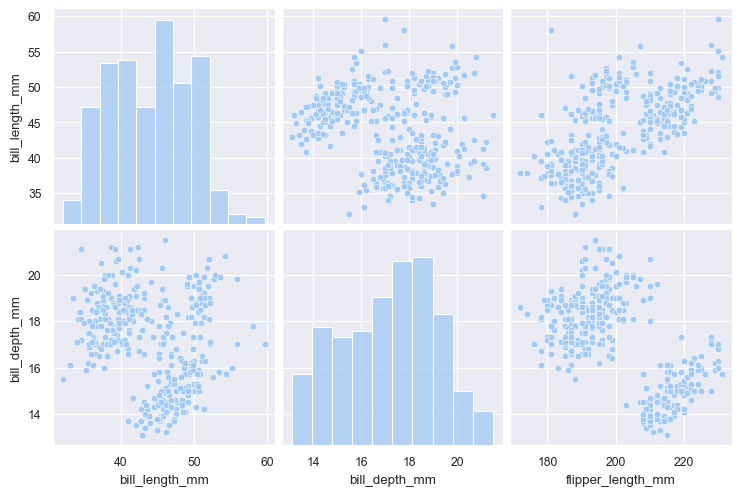

In [12]:
# x_vars, y_vars 키워드 인수를 활용하여 원하는 column만 추려서 비교를 할 수도 
# 있습니다.꼭 정방형의 모양이 아니더라도 괜찮습니다.


sns.pairplot(penguins,
             x_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
             y_vars=["bill_length_mm", "bill_depth_mm"],
            )

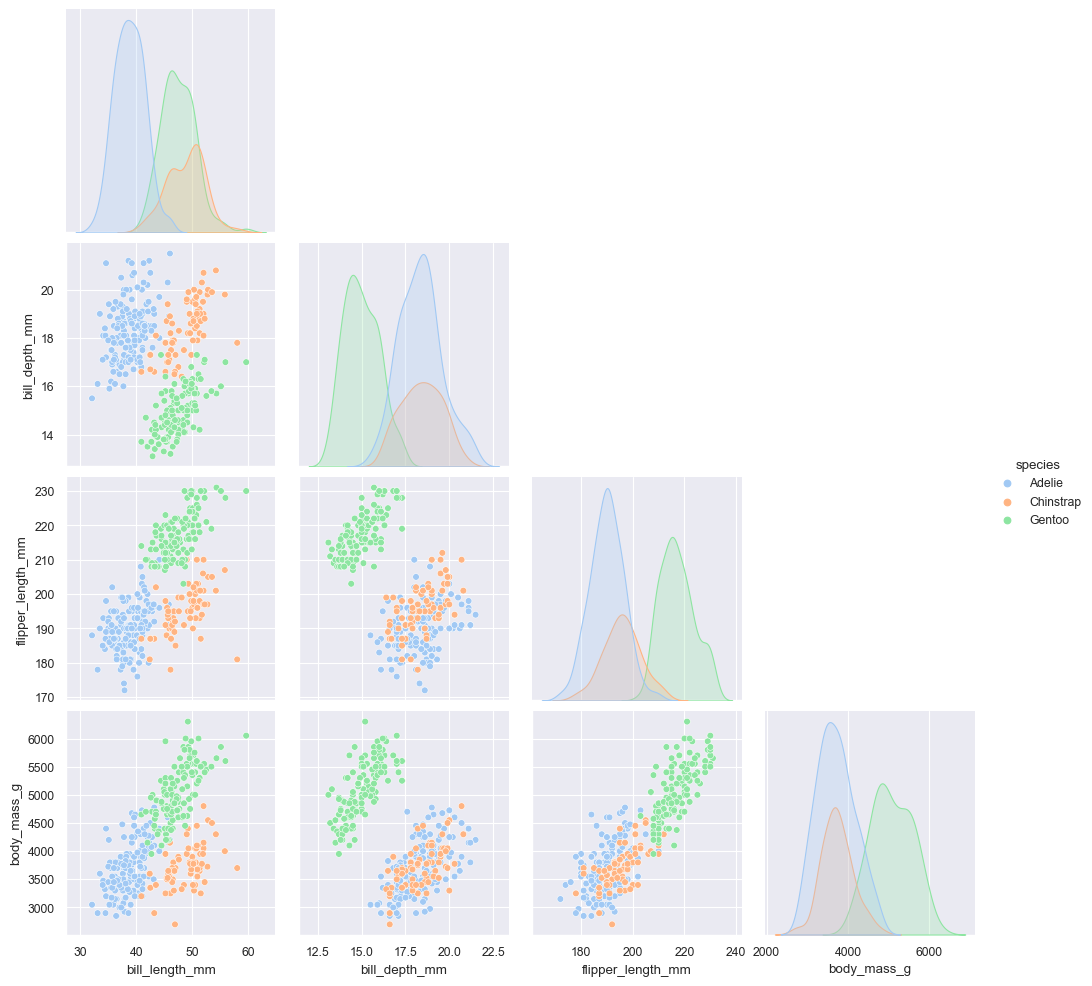

In [13]:
# 중복되는 부분을 없애려면 이렇게 x_vars, y_vars 키워드 인수를 활용하여 
# 원하는 column만 추려서 비교를 할 수도 있습니다.
# 꼭 정방형의 모양이 아니더라도 괜찮습니다.


sns.pairplot(penguins, hue="species", corner=True)

## pandas pivot table
pivot table이란 데이터 column 중에서 두 개의 column을 각각 row 인덱스, column 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것을 말합니다.  
pandas는 지정된 두 column을 각각 row 인덱스와 column 인덱스로 바꾼 후 row 인덱스의 label 값이 첫번째 키의 값과 같고 column 인덱스의 label 값이 두번째 키의 값과 같은 데이터를 찾아서 해당 칸에 넣습니다.  
만약 주어진 데이터가 존재하지 않으면 해당 칸에 NaN 값을 넣습니다.  

pandas는 pivot table을 만들기 위한 pivot_table() 메서드를 제공합니다.  
첫번째 인수로는 DataFrame을, 두번째 인수로는 데이터로 사용할 column 이름을, 세번째 
인수로는 row 인덱스로 사용할 column name, 네번째 인수로는 column 인덱스로 사용할 
column name을 넣습니다.  
그 다음은 aggfunc 키워드 인자가 나오는데 기본적으로 평균 값을 구하도록 default 값이 설정되어있습니다.

In [99]:
import pandas as pd
titanic = sns.load_dataset("titanic")
pd.pivot_table(titanic, "survived", index="class", columns="who") # default로 가져와서 values의 mean을 output으로 준다.

who        child       man     woman
class                               
First   0.833333  0.352941  0.978022
Second  1.000000  0.080808  0.909091
Third   0.431034  0.119122  0.491228

In [100]:
# 다른 인자를 전달
pd.pivot_table(titanic, "survived", index="class", columns="who", aggfunc=np.sum)

who     child  man  woman
class                    
First       5   42     89
Second     19    8     60
Third      25   38     56

In [101]:
pd.pivot_table(titanic, "survived", index="class", columns="deck", aggfunc=np.mean)

# 해당하는 값이 없다면 이는 NaN으로 표현됩니다. 이 값은 pivot_table() 메서드 인자 중 
# fill_value에 값을 전달하면 해당 값으로 NaN이 처리되게 됩니다.

deck           A         B        C         D     E      F    G
class                                                          
First   0.466667  0.744681  0.59322  0.758621  0.72    NaN  NaN
Second       NaN       NaN      NaN  0.750000  0.75  0.875  NaN
Third        NaN       NaN      NaN       NaN  1.00  0.200  0.5

In [102]:
pd.pivot_table(titanic, "survived", index="class", columns="deck", aggfunc=np.mean, fill_value=0)

deck           A         B        C         D     E      F    G
class                                                          
First   0.466667  0.744681  0.59322  0.758621  0.72  0.000  0.0
Second  0.000000  0.000000  0.00000  0.750000  0.75  0.875  0.0
Third   0.000000  0.000000  0.00000  0.000000  1.00  0.200  0.5

## heatmap()
데이터셋 중 비교하고자 하는 column의 pair가 모두 카테고리 값이거나, 피봇테이블의 결과를 가지고 heatmap()으로 표현하면 각 column 간의 상관 관계를 색상의 짙고 옅음으로 표현할 수 있습니다.

아래에선 타이타닉호 데이터셋 중 선실 등급과 사람의 분류에 따라 생존률을 피봇테이블의 결과로 만들었습니다. 그리고 이 피봇테이블을 heatmap()의 인수로 전달했습니다.  
또 cmap을 활용하여 “crest” 테마를 적용했습니요. 짙은 푸른 빛을 띌수록 생존율이 높고 노란 빛에 가까울수록 생존율이 낮습니다.

<AxesSubplot:xlabel='who', ylabel='class'>

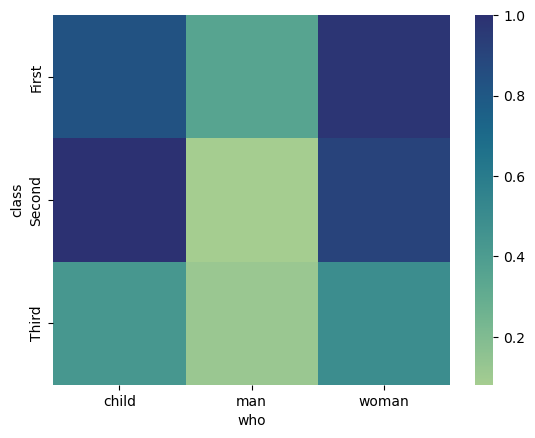

In [103]:
# heatmap()
# 색상에 따라 인덱싱한 피봇 테이블이다.

ttn_cls_who = pd.pivot_table(titanic, "survived", index="class", columns="who")
sns.heatmap(ttn_cls_who, cmap="crest")

<AxesSubplot:xlabel='who', ylabel='class'>

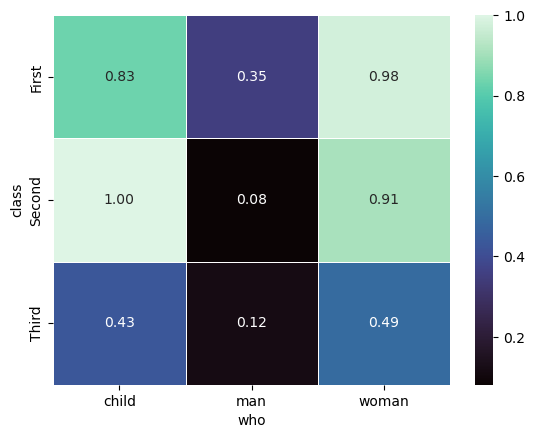

In [104]:
sns.heatmap(ttn_cls_who, cmap="mako", annot=True, fmt=".2f", linewidth=.5)
# fmt=".2f" -> 소수점 둘째자리까지 표현하라는 인수값 
# linewidth=.5 -> 0.5두께의 선을 만들어주라는 인수값 
# annot 키워드 인수에 True 값을 줘서 각 cell마다 value를 표기

#### 연습 문제
각자 선호하는 데이터셋을 선택하고 그 데이터셋을 가지고 지금까지 배운 Seaborn 그래프를 통해서 의미있는 결과를 각자 도출해보세요.

In [105]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [107]:
penguins[penguins["island"] == "Torgersen"]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
6    Adelie  Torgersen            38.9           17.8              181.0   
7    Adelie  Torgersen            39.2           19.6              195.0   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
12   Adelie  Torgersen            41.1           17.6              182.0   
13   Adelie  Torgersen            38.6           21.2              191.0   
14   Adelie  Torgersen            34.6           21.1              198.0   
15   Adelie  Torgersen            36.6           17.8              185.0   
16   Adelie  Torgersen            38.7           19.0              195.0   
17   Adelie  Torgersen            42.5           20.7              197.0   
18   Adelie  Torgersen            34.4           18.4              184.0   
19   Adelie  Torgersen            46.0           21.5              194.0   
68   Adelie  Torgersen            35.9           16.6              190.0   
69   Adelie  Torgersen            41.8           19.4              198.0   
70   Adelie  Torgersen            33.5           19.0              190.0   
71   Adelie  Torgersen            39.7           18.4              190.0   
72   Adelie  Torgersen            39.6           17.2              196.0   
73   Adelie  Torgersen            45.8           18.9              197.0   
74   Adelie  Torgersen            35.5           17.5              190.0   
75   Adelie  Torgersen            42.8           18.5              195.0   
76   Adelie  Torgersen            40.9           16.8              191.0   
77   Adelie  Torgersen            37.2           19.4              184.0   
78   Adelie  Torgersen            36.2           16.1              187.0   
79   Adelie  Torgersen            42.1           19.1              195.0   
80   Adelie  Torgersen            34.6           17.2              189.0   
81   Adelie  Torgersen            42.9           17.6              196.0   
82   Adelie  Torgersen            36.7           18.8              187.0   
83   Adelie  Torgersen            35.1           19.4              193.0   
116  Adelie  Torgersen            38.6           17.0              188.0   
117  Adelie  Torgersen            37.3           20.5              199.0   
118  Adelie  Torgersen            35.7           17.0              189.0   
119  Adelie  Torgersen            41.1           18.6              189.0   
120  Adelie  Torgersen            36.2           17.2              187.0   
121  Adelie  Torgersen            37.7           19.8              198.0   
122  Adelie  Torgersen            40.2           17.0              176.0   
123  Adelie  Torgersen            41.4           18.5              202.0   
124  Adelie  Torgersen            35.2           15.9              186.0   
125  Adelie  Torgersen            40.6           19.0              199.0   
126  Adelie  Torgersen            38.8           17.6              191.0   
127  Adelie  Torgersen            41.5           18.3              195.0   
128  Adelie  Torgersen            39.0           17.1              191.0   
129  Adelie  Torgersen            44.1           18.0              210.0   
130  Adelie  Torgersen            38.5           17.9              190.0   
131  Adelie  Torgersen            43.1           19.

In [108]:
penguins[penguins["island"] == "Biscoe"]

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
20   Adelie  Biscoe            37.8           18.3              174.0   
21   Adelie  Biscoe            37.7           18.7              180.0   
22   Adelie  Biscoe            35.9           19.2              189.0   
23   Adelie  Biscoe            38.2           18.1              185.0   
24   Adelie  Biscoe            38.8           17.2              180.0   
..      ...     ...             ...            ...                ...   
339  Gentoo  Biscoe             NaN            NaN                NaN   
340  Gentoo  Biscoe            46.8           14.3              215.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
342  Gentoo  Biscoe            45.2           14.8              212.0   
343  Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
20        3400.0  Female  
21        3600.0    Male  
22        3800.0  Female  
23        3950.0    Male  
24        3800.0    Male  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[168 rows x 7 columns]

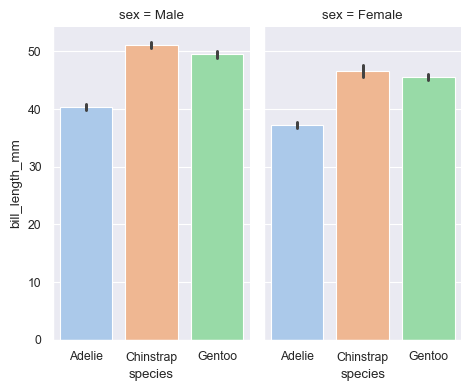

In [26]:
sns.catplot(data=penguins, x="species", y="bill_length_mm", col="sex",
            kind="bar", height=4, aspect=.6)